# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

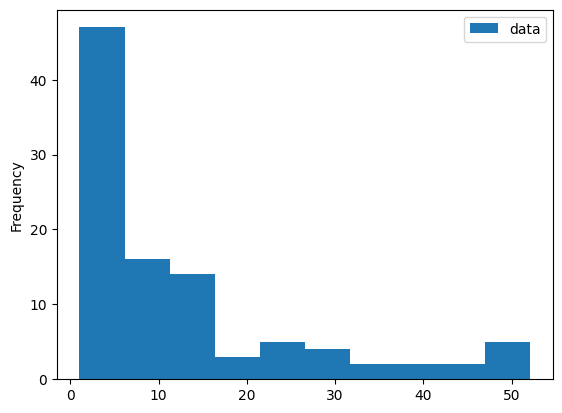

In [2]:

print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

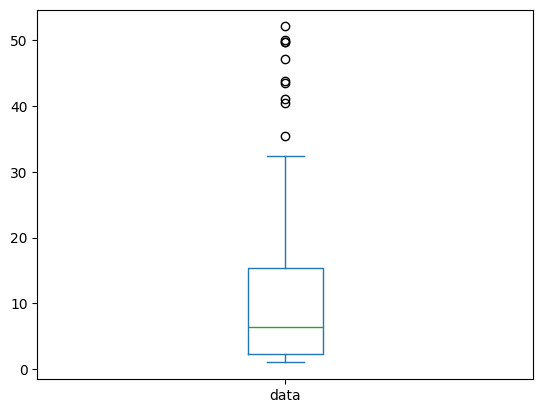

In [3]:

df.plot.box()

Histogram
Pros:

Distribution: Clearly shows the distribution of data, indicating how many data points fall into each bin.

Frequency: Provides a good sense of the frequency and range of data points.

Shape: Easy to identify the shape of the distribution (e.g., normal, skewed).

Cons:

Granularity: The choice of bin width can significantly affect the visualization; too wide or too narrow bins can obscure important details.

Outliers: Not as effective in highlighting outliers as a boxplot.

Boxplot
Pros:

Summary Statistics: Shows median, quartiles, and potential outliers succinctly.

Comparison: Great for comparing distributions between different groups.

Outliers: Effectively highlights outliers which are key to identifying the expensive drugs in this context.

Cons:

Distribution Shape: Doesn’t provide detailed insight into the distribution shape beyond quartiles.

Density: Less effective in showing the density and frequency of data points compared to a histogram.

Recommendation
Given the administrator's interest in understanding the more expensive drugs in the context of the other prices, I would choose the boxplot. It provides a clear view of summary statistics and highlights outliers, which are likely to be the more expensive drugs.

Formatting Suggestions
To make the boxplot more visually interesting and informative, consider these modifications:

Color: Use different colors for different quartiles to visually distinguish them.

Labels: Add labels for the median, quartiles, and outliers to make the information more accessible.

Annotations: Annotate the highest and lowest outliers with specific price values for quick reference.

Title: Include a descriptive title and axis labels to ensure clarity.

C:\Users\fjmrm\AppData\Local\Temp\ipykernel_35556\653916472.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="data", palette="Set3")


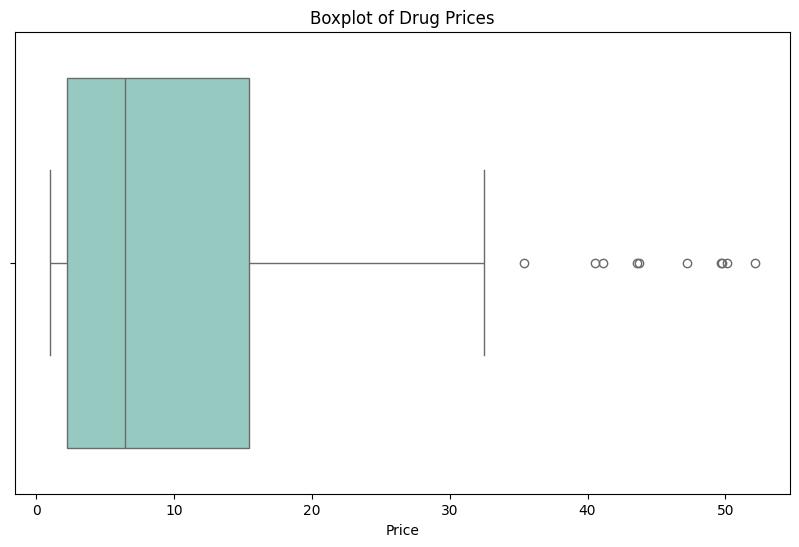

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size=num_data) * 4)
df = pd.DataFrame(data.T, columns=["data"])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="data", palette="Set3")
plt.title('Boxplot of Drug Prices')
plt.xlabel('Price')
plt.show()


# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

UNITED STATES ENERGY GENERATION DATASET

This notebook focuses on analyzing monthly electricity generation data for U.S. states, sourced from https://www.eia.gov/electricity/data.php, spanning from 2001 to May 2022. The aim is to examine patterns, including the growth in renewable energy usage and seasonal fluctuations in power generation. These insights lay the groundwork for crafting Machine Learning models to monitor changes in energy production by resource type and service provider over time.



Import some necessary libraries for exploratory dada analyses and more.

In [5]:
import numpy as np
import pandas as pd

<b> Using Pandas dataframe the data stored in a local drive was imported and transfromed into a pandas dataframe but the first column was excluded to prevent having double indices.

In [6]:
data=pd.read_csv("organised_Gen.csv", index_col=0)
df = pd.DataFrame(data)
df.head()

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,2001,1,AK,Total Electric Power Industry,Wind,87.0


<b> Using df.info(), a concise summary of a DataFrame's structure and contents could be displayed. Useful for quickly checking the dataset's structure, identifying missing values, and understanding the data types for preprocessing or analysis. </b>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496774 entries, 0 to 10585
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YEAR                        496774 non-null  int64  
 1   MONTH                       496774 non-null  int64  
 2   STATE                       496774 non-null  object 
 3   TYPE OF PRODUCER            496774 non-null  object 
 4   ENERGY SOURCE               496774 non-null  object 
 5   GENERATION (Megawatthours)  496774 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 26.5+ MB


<b> A statistical summary of the numerical columns in the DataFrame using df.describe(). </b>

In [8]:
df.describe()

,YEAR,MONTH,GENERATION (Megawatthours)
count,496774.000000,496774.000000,4.967740e+05
mean,2011.649768,6.431452,1.393384e+06
std,6.168041,3.458944,1.078685e+07
min,2001.000000,1.000000,-9.978550e+05
25%,2006.000000,3.000000,1.643000e+03
50%,2012.000000,6.000000,2.330103e+04
75%,2017.000000,9.000000,2.792042e+05
max,2022.000000,12.000000,4.217967e+08


<b> Check for Null values in the dataset using df.isnull().sum()

In [9]:
df.isnull().sum()

YEAR                          0
MONTH                         0
STATE                         0
TYPE OF PRODUCER              0
ENERGY SOURCE                 0
GENERATION (Megawatthours)    0
dtype: int64

In [10]:
has_null = df.isnull().values.any()
has_null

np.False_

<b> Find duplicate rows

In [11]:
# Find duplicate rows
duplicates = df.duplicated()
duplicates.sum()

np.int64(0)

<b> There are no duplicate rows in the dataset.

<b>Examine the individual columns

In [12]:
df.columns

Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (Megawatthours)'],
      dtype='object')

In [13]:
for item in df.columns:
    print(item)
    print(df[item].unique())

YEAR
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022]
MONTH
[ 1  2  3  4  5  6  7  8  9 10 11 12]
STATE
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' 'US-TOTAL']
TYPE OF PRODUCER
['Total Electric Power Industry' 'Electric Generators, Electric Utilities'
 'Combined Heat and Power, Electric Power'
 'Combined Heat and Power, Commercial Power'
 'Combined Heat and Power, Industrial Power'
 'Electric Generators, Independent Power Producers']
ENERGY SOURCE
['Coal' 'Petroleum' 'Natural Gas' 'Hydroelectric Conventional' 'Wind'
 'Total' 'Other Gases' 'Nuclear' 'Wood and Wood Derived Fuels'
 'Other Biomass' 'Other' 'Solar Thermal and Photovoltaic' 'Pumped Storage'
 'Geothermal']
GENERATION (Megawatthours)
[ 46903.  71085. 36

<b> Convert the month numbers into month names

In [14]:
# Renaming the month column values
df['MONTH'] = df['MONTH'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February', 'March', 'April','May','June','July','August','September','October','November','December'])

In [15]:
df.head()

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,2001,January,AK,Total Electric Power Industry,Coal,46903.0
1,2001,January,AK,Total Electric Power Industry,Petroleum,71085.0
2,2001,January,AK,Total Electric Power Industry,Natural Gas,367521.0
3,2001,January,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,2001,January,AK,Total Electric Power Industry,Wind,87.0


<b>Refined the data frame, by applying a filter to isolate total energy generation, enabling the analysis of patterns in energy sources and types of producers. Entries labeled "Total Electric Power Industry" under TYPE OF PRODUCER and "Total" under ENERGY SOURCE were excluded to ensure accuracy and prevent complications during future groupby calculations.

In [16]:
#Testing of plots
Total_energy = df[df['STATE']=='US-TOTAL']
Total_energy = Total_energy[(Total_energy['TYPE OF PRODUCER']!='Total Electric Power Industry')&(Total_energy['ENERGY SOURCE']!='Total')]
Total_energy

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
1619,2001,January,US-TOTAL,"Electric Generators, Electric Utilities",Coal,143856344.0
1620,2001,January,US-TOTAL,"Electric Generators, Electric Utilities",Petroleum,11373785.0
1621,2001,January,US-TOTAL,"Electric Generators, Electric Utilities",Natural Gas,15553422.0
1622,2001,January,US-TOTAL,"Electric Generators, Electric Utilities",Other Gases,0.0
1623,2001,January,US-TOTAL,"Electric Generators, Electric Utilities",Nuclear,48875592.0
...,...,...,...,...,...,...
10317,2022,May,US-TOTAL,"Electric Generators, Electric Utilities",Petroleum,1153849.0
10318,2022,May,US-TOTAL,"Electric Generators, Electric Utilities",Solar Thermal and Photovoltaic,1833664.0
10319,2022,May,US-TOTAL,"Electric Generators, Electric Utilities",Other Biomass,92255.0
10320,2022,May,US-TOTAL,"Electric Generators, Electric Utilities",Wind,6936214.0





<b> UNIVARIATE ANALYSES




<b> Plot the individual Histograms fo the energy sources

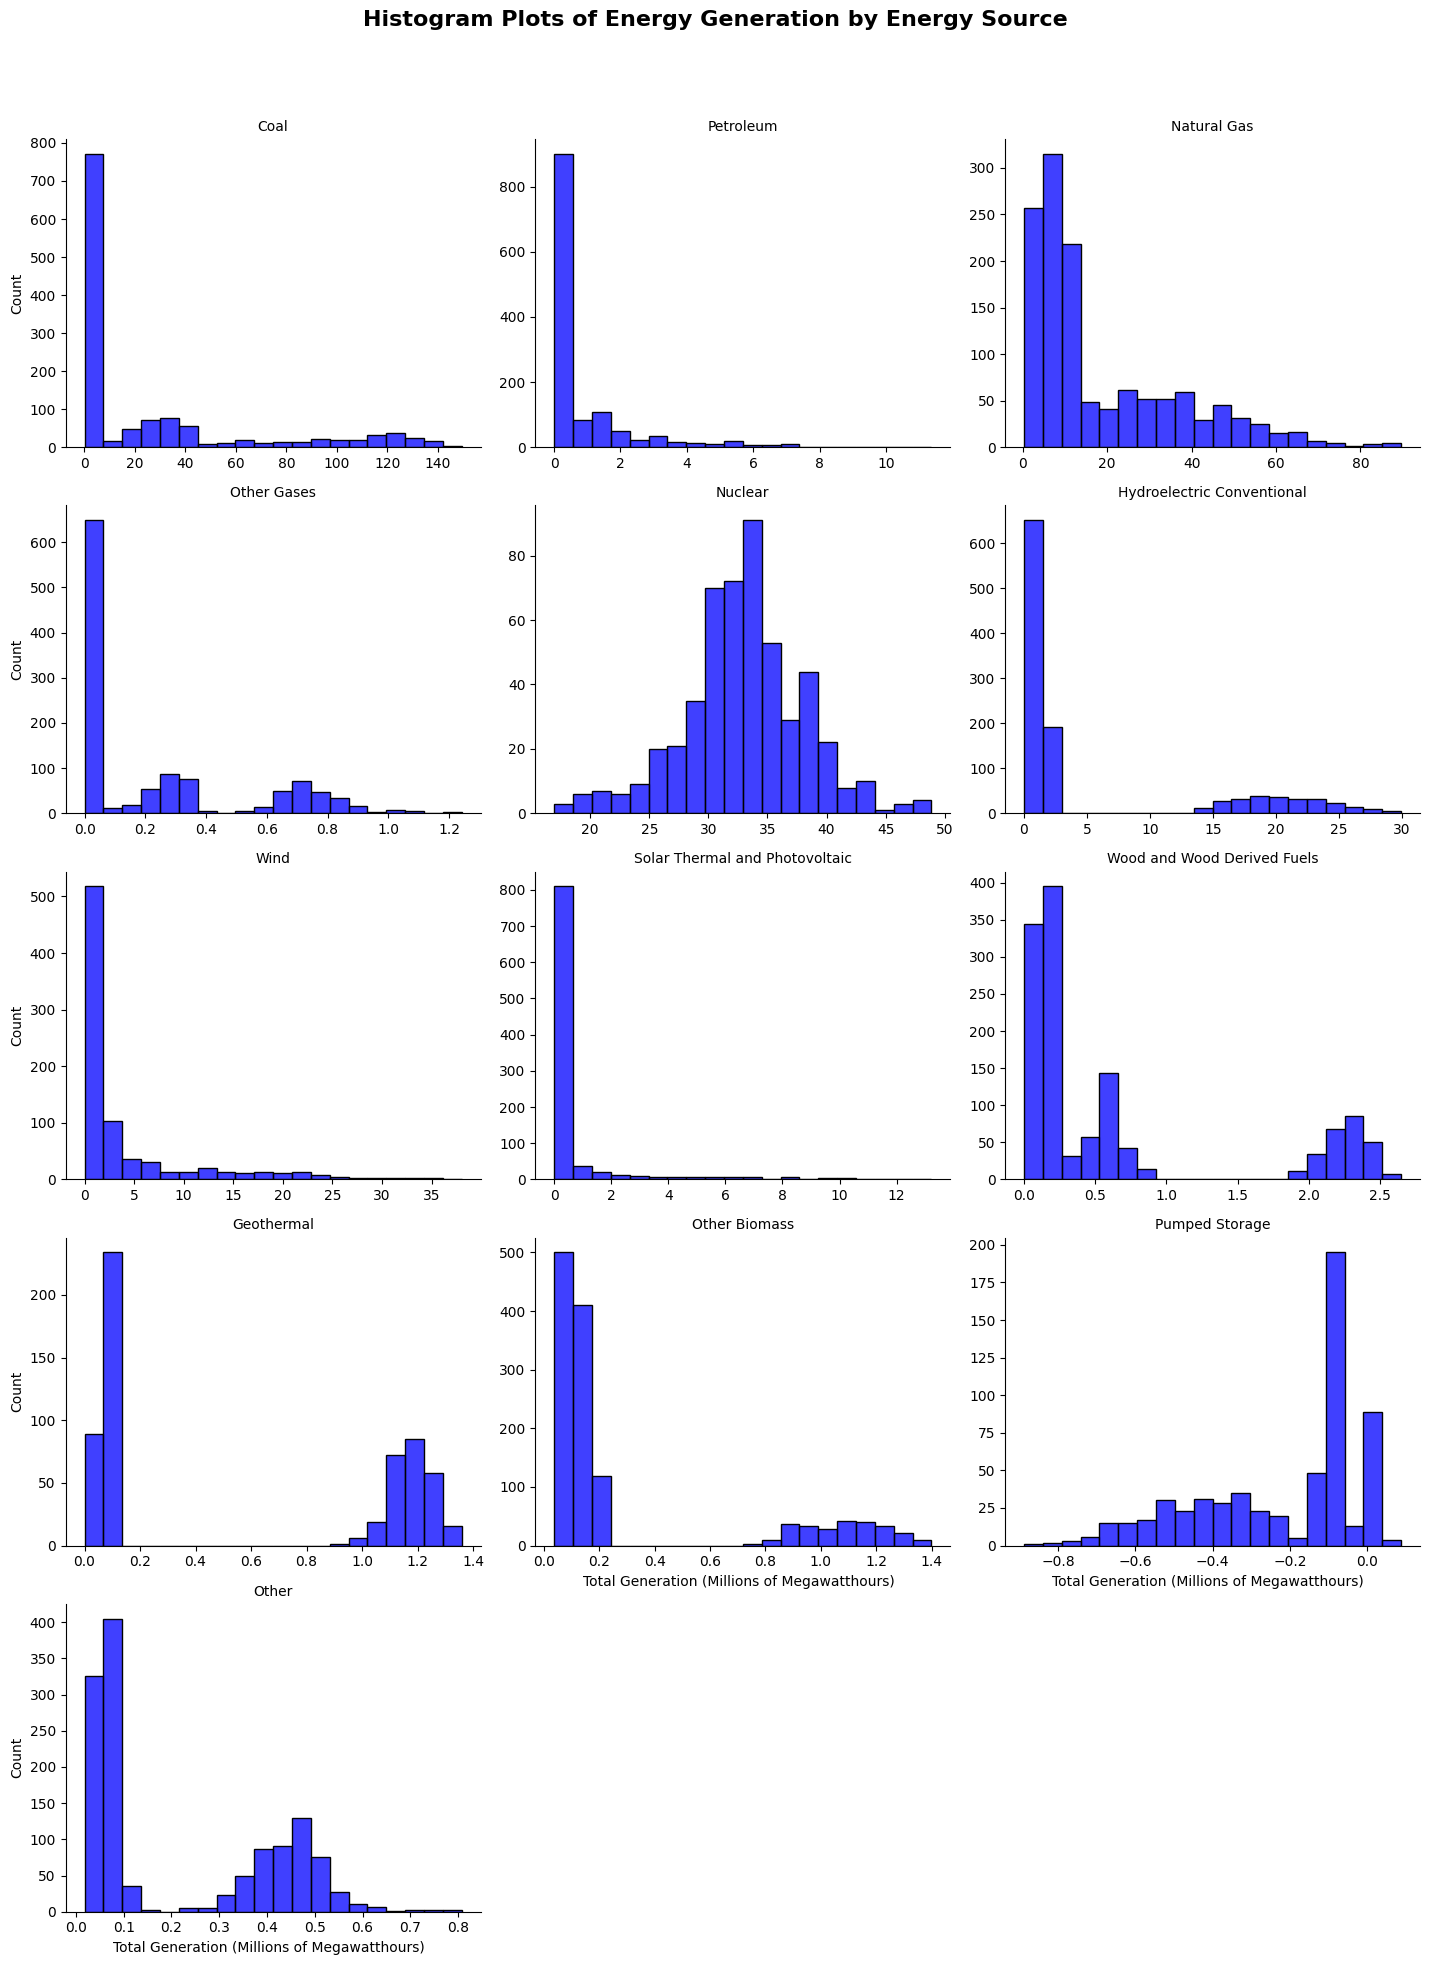

In [17]:


# Converting 'Generation' to billions for readability (optional)
Total_energy['Generation (Millions)'] = Total_energy['GENERATION (Megawatthours)'] / 1e6

# Setting up the FacetGrid for individual histograms by energy source
g = sns.FacetGrid(
    data=Total_energy,
    col='ENERGY SOURCE',        # Create separate plots for each energy source
    col_wrap=3,                 # Number of plots per row
    sharex=False,               # Allow individual x-axis scale for each plot
    sharey=False,               # Allow individual y-axis scale for each plot
    height=4,                   # Height of each plot
    aspect=1.2                  # Aspect ratio of each plot
)

# Mapping the histogram plot to each facet
g.map(
    sns.histplot,
    'Generation (Millions)',    # Variable to plot
    bins=20,                    # Number of bins in the histogram
    color='blue',               # Bar color
    kde=False                   # Disable KDE overlay
)

# Adding titles for each energy source
g.set_titles('{col_name}')     # Titles for each subplot

# Adding overall title and axis labels
g.fig.suptitle('Histogram Plots of Energy Generation by Energy Source', fontsize=16, weight='bold')
g.set_axis_labels('Total Generation (Millions of Megawatthours)  ', 'Count')

# Adjusting layout for spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
plt.show()




<b> Plot the KDE of the individual energy sources

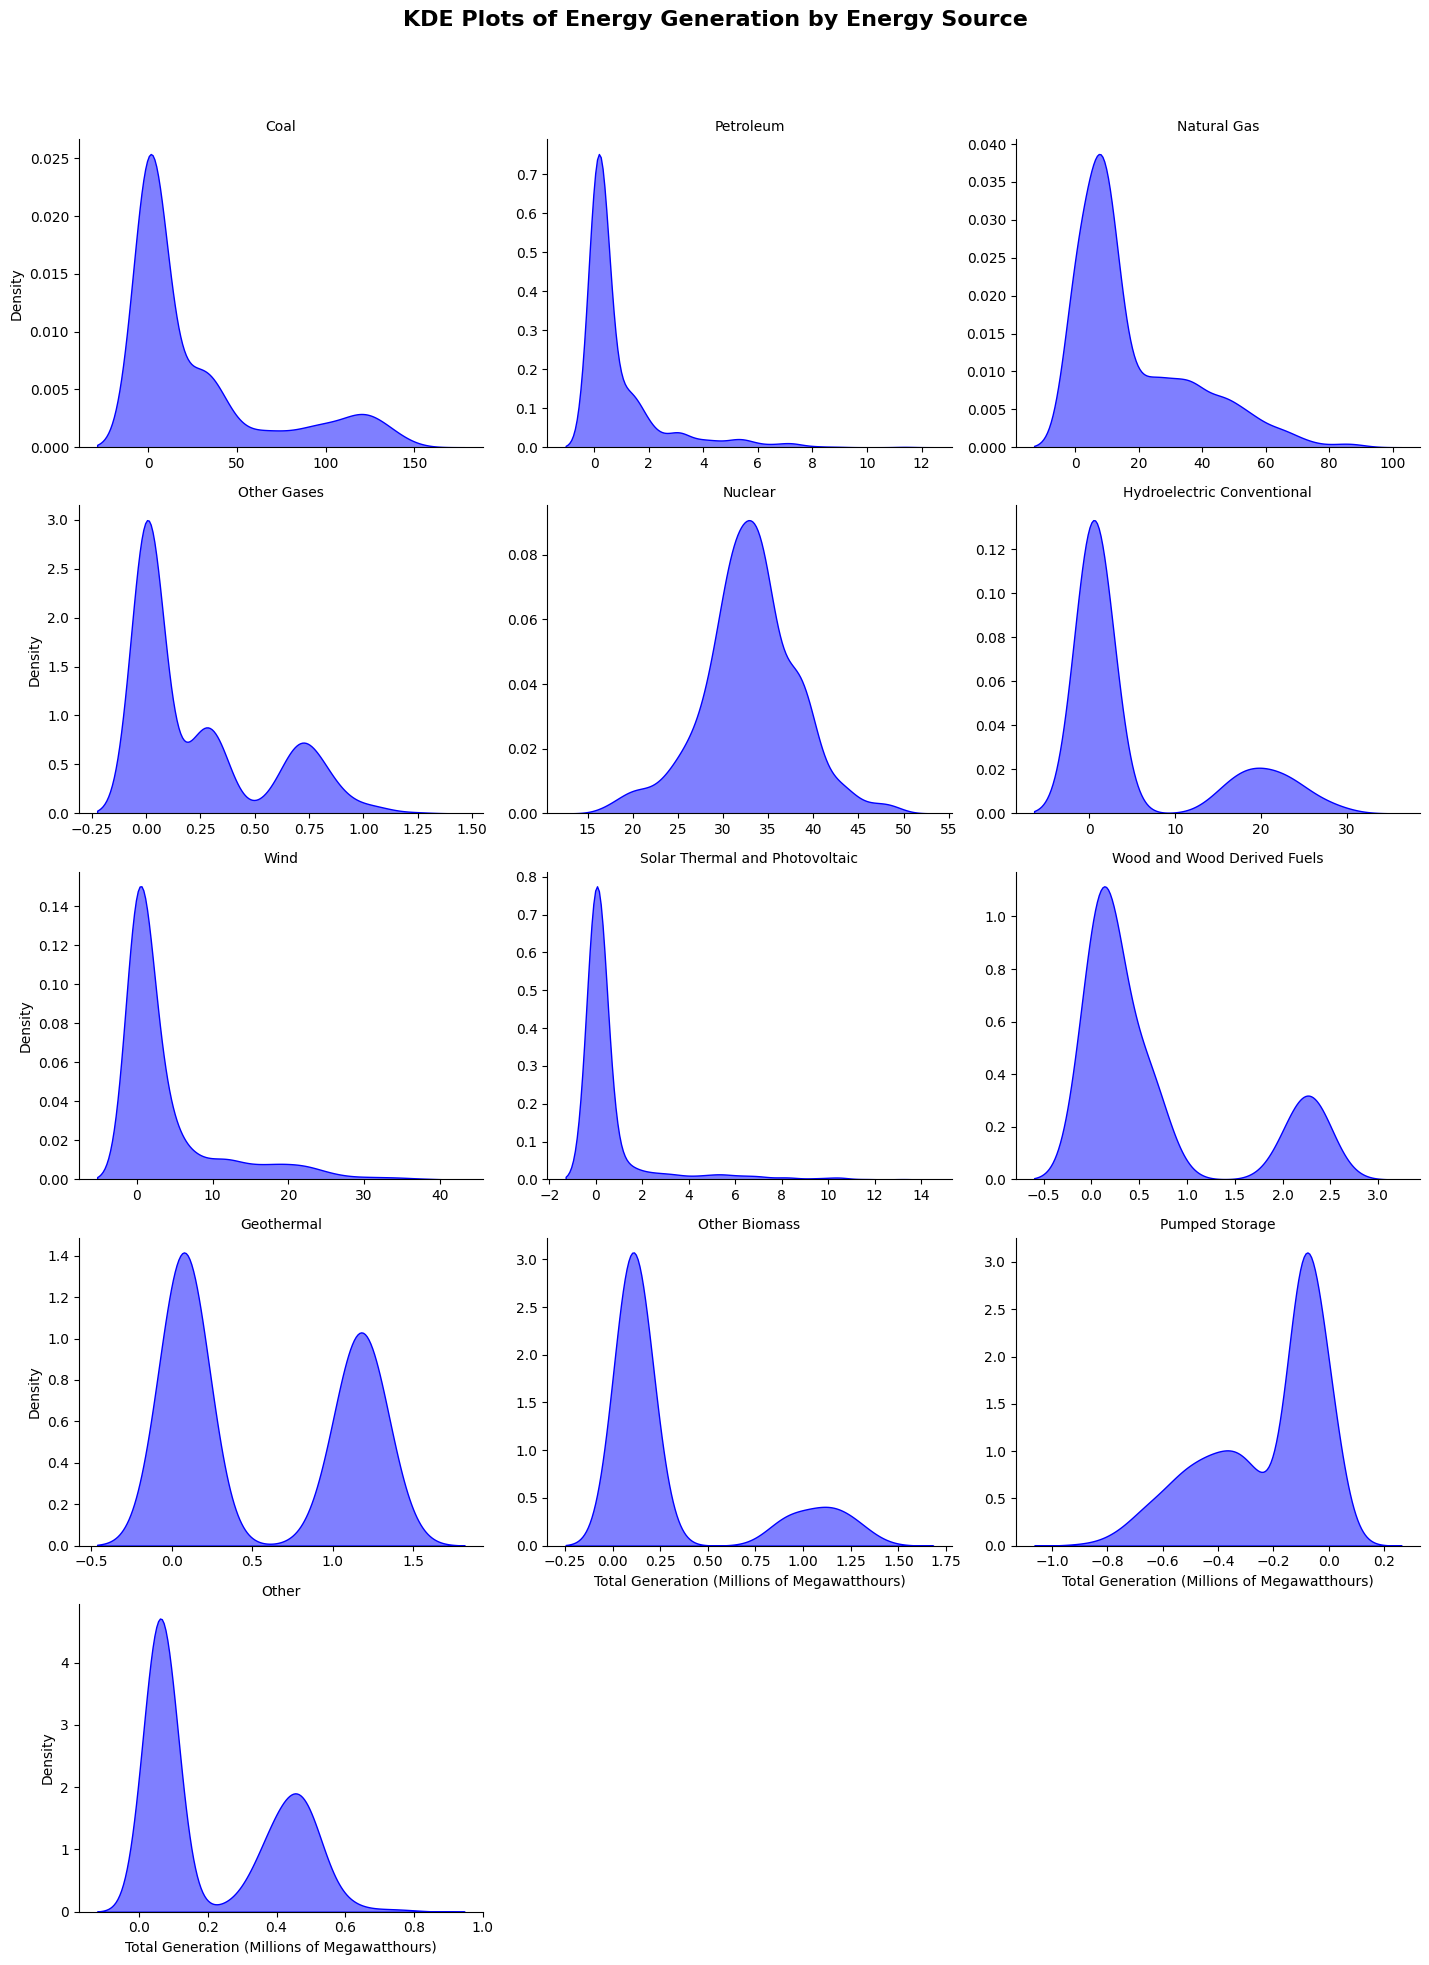

In [18]:


# Converting 'Generation' to billions for readability (optional)
Total_energy['Generation (Millions)'] = Total_energy['GENERATION (Megawatthours)'] / 1e6

# Setting up the FacetGrid for individual KDE plots by energy source
g = sns.FacetGrid(
    data=Total_energy,
    col='ENERGY SOURCE',        # Create separate plots for each energy source
    col_wrap=3,                 # Number of plots per row
    sharex=False,               # Allow individual x-axis scale for each plot
    sharey=False,               # Allow individual y-axis scale for each plot
    height=4,                   # Height of each plot
    aspect=1.2                  # Aspect ratio of each plot
)

# Mapping the KDE plot to each facet
g.map(
    sns.kdeplot,
    'Generation (Millions)',    # Variable to plot
    fill=True,                  # Fill the area under the curve
    alpha=0.5,                  # Transparency
    color='blue'                # Curve color (optional)
)

# Adding titles for each energy source
g.set_titles('{col_name}')     # Titles for each subplot

# Adding overall title and axis labels
g.fig.suptitle('KDE Plots of Energy Generation by Energy Source', fontsize=16, weight='bold')
g.set_axis_labels('Total Generation (Millions of Megawatthours)', 'Density')

# Adjusting layout for spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
plt.show()





<b> BI-VARIATE ANALYSES

<b> Plot a histogram of the variuos energy sources vs the amount of energy generated in MegaWatts.

C:\Users\fjmrm\AppData\Local\Temp\ipykernel_35556\2265824656.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


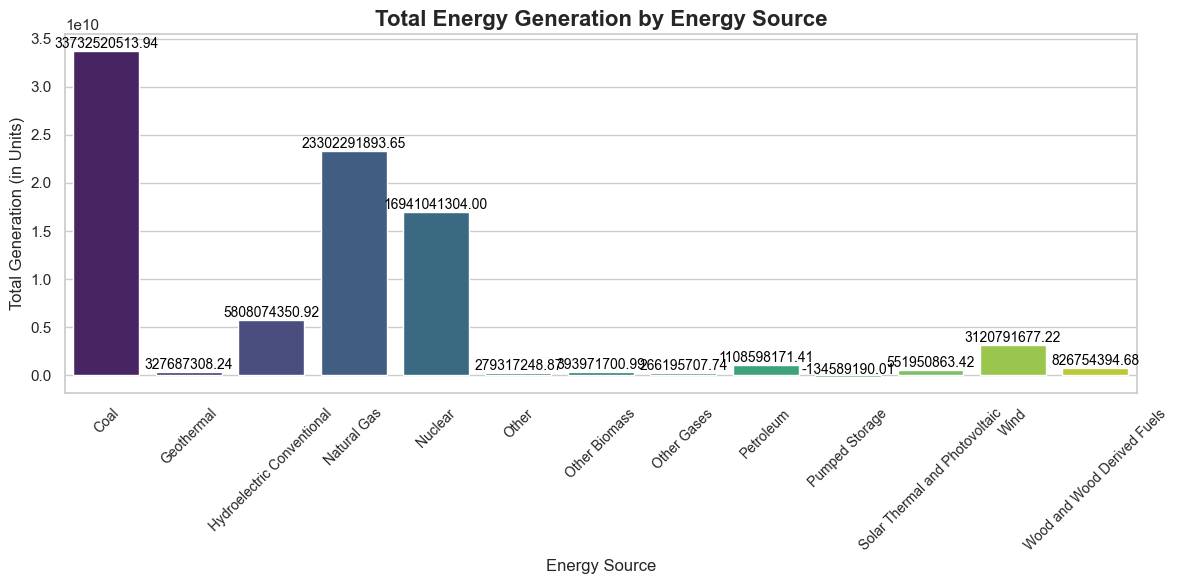

In [19]:


# Example: Aggregating total generation by 'ENERGY SOURCE'
energy_by_source = Total_energy.groupby('ENERGY SOURCE')['GENERATION (Megawatthours)'].sum().reset_index()

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating the bar plot
plt.figure(figsize=(12, 6))  # Adjusting figure size
bar_plot = sns.barplot(
    data=energy_by_source,
    x='ENERGY SOURCE',
    y='GENERATION (Megawatthours)',
    palette='viridis',  # Choose a beautiful color palette
)

# Adding titles and labels
plt.title('Total Energy Generation by Energy Source', fontsize=16, weight='bold')
plt.xlabel('Energy Source', fontsize=12)
plt.ylabel('Total Generation (in Units)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Adding value annotations on top of the bars
for bar in bar_plot.patches:
    bar_plot.annotate(
        format(bar.get_height(), '.2f'),  # Formatting the values
        (bar.get_x() + bar.get_width() / 2., bar.get_height()),
        ha='center', va='bottom',
        fontsize=10, color='black',
    )

# Displaying the plot
plt.tight_layout()
plt.show()


<b> Use a log scale of the vertical axis to make the smallest bars more visible.

C:\Users\fjmrm\AppData\Local\Temp\ipykernel_35556\2438274152.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


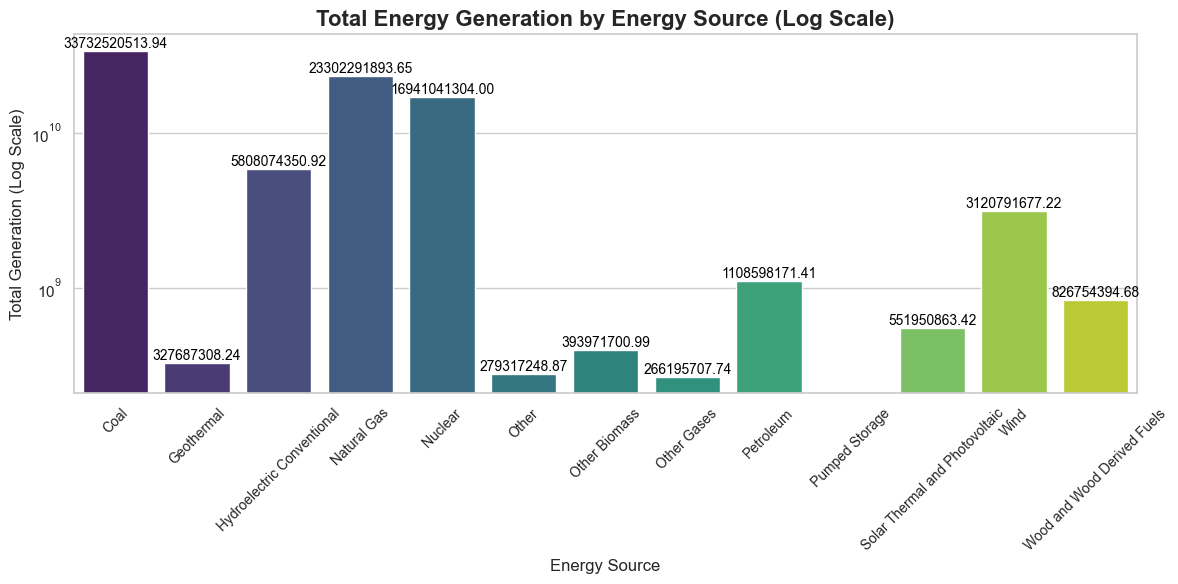

In [20]:


# Example: Aggregating total generation by 'ENERGY SOURCE'
energy_by_source = Total_energy.groupby('ENERGY SOURCE')['GENERATION (Megawatthours)'].sum().reset_index()

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating the bar plot
plt.figure(figsize=(12, 6))  # Adjusting figure size
bar_plot = sns.barplot(
    data=energy_by_source,
    x='ENERGY SOURCE',
    y='GENERATION (Megawatthours)',
    palette='viridis',  # Choose a beautiful color palette
)

# Setting the vertical axis to logarithmic scale
plt.yscale('log')

# Adding titles and labels
plt.title('Total Energy Generation by Energy Source (Log Scale)', fontsize=16, weight='bold')
plt.xlabel('Energy Source', fontsize=12)
plt.ylabel('Total Generation (Log Scale)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Adding value annotations on top of the bars (adjusting to log scale)
for bar in bar_plot.patches:
    height = bar.get_height()
    bar_plot.annotate(
        format(height, '.2f'),
        (bar.get_x() + bar.get_width() / 2., height),
        ha='center', va='bottom',
        fontsize=10, color='black',
    )

# Displaying the plot
plt.tight_layout()
plt.show()


C:\Users\fjmrm\AppData\Local\Temp\ipykernel_35556\3077198458.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


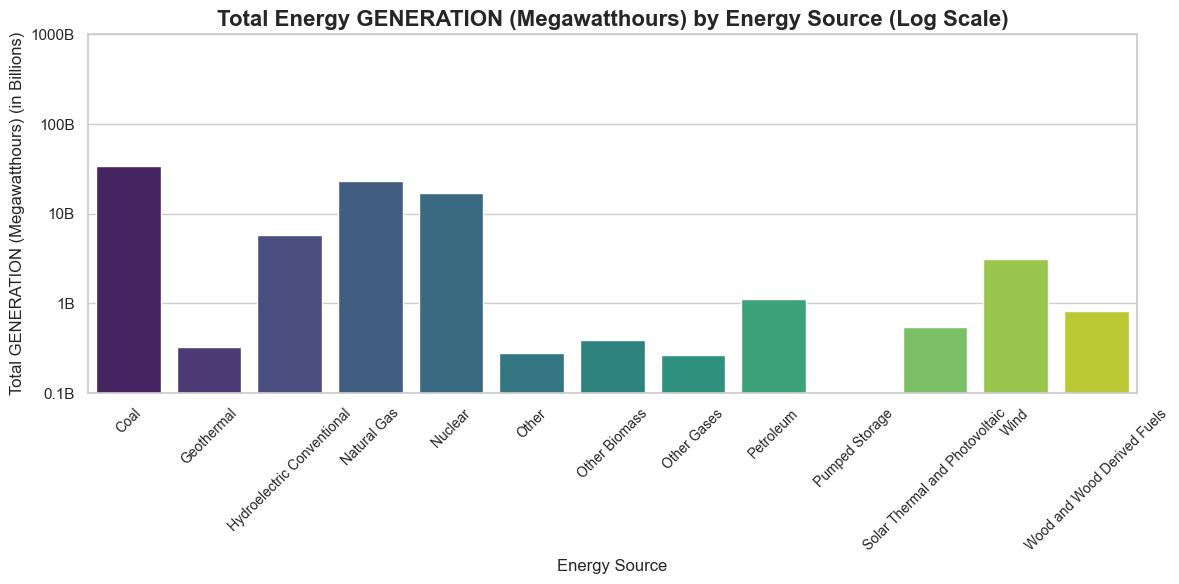

In [21]:


# Example: Aggregating total GENERATION (Megawatthours) by 'ENERGY SOURCE'
energy_by_source = Total_energy.groupby('ENERGY SOURCE')['GENERATION (Megawatthours)'].sum().reset_index()

# Converting the 'GENERATION (Megawatthours)' column to billions for easier visualization
energy_by_source['GENERATION (Megawatthours)'] = energy_by_source['GENERATION (Megawatthours)'] / 1e9

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating the bar plot
plt.figure(figsize=(12, 6))  # Adjusting figure size
sns.barplot(
    data=energy_by_source,
    x='ENERGY SOURCE',
    y='GENERATION (Megawatthours)',
    palette='viridis',  # Choose a beautiful color palette
)

# Setting the vertical axis to logarithmic scale
plt.yscale('log')

# Refining the y-axis ticks for better readability
ticks = [0.1, 1, 10, 100, 1000]  # Example tick values in billions
tick_labels = ['0.1B', '1B', '10B', '100B', '1000B']  # Custom labels for these ticks
plt.yticks(ticks, tick_labels)

# Adding titles and labels
plt.title('Total Energy GENERATION (Megawatthours) by Energy Source (Log Scale)', fontsize=16, weight='bold')
plt.xlabel('Energy Source', fontsize=12)
plt.ylabel('Total GENERATION (Megawatthours) (in Billions)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Displaying the plot
plt.tight_layout()
plt.show()


C:\Users\fjmrm\AppData\Local\Temp\ipykernel_35556\451556799.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


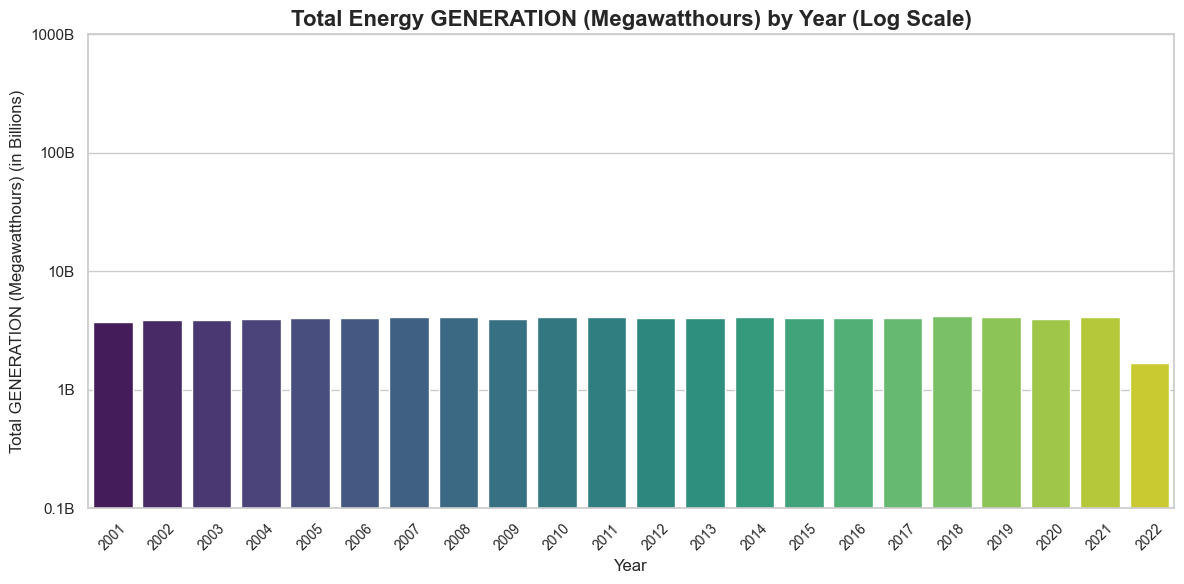

In [22]:


# Example: Aggregating total generation by 'YEAR'
energy_by_year = Total_energy.groupby('YEAR')['GENERATION (Megawatthours)'].sum().reset_index()

# Converting the 'GENERATION (Megawatthours)' column to billions for easier visualization
energy_by_year['GENERATION (Megawatthours)'] = energy_by_year['GENERATION (Megawatthours)'] / 1e9

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating the bar plot
plt.figure(figsize=(12, 6))  # Adjusting figure size
sns.barplot(
    data=energy_by_year,
    x='YEAR',
    y='GENERATION (Megawatthours)',
    palette='viridis',  # Choose a beautiful color palette
)

# Setting the vertical axis to logarithmic scale
plt.yscale('log')

# Refining the y-axis ticks for better readability
ticks = [0.1, 1, 10, 100, 1000]  # Example tick values in billions
tick_labels = ['0.1B', '1B', '10B', '100B', '1000B']  # Custom labels for these ticks
plt.yticks(ticks, tick_labels)

# Adding titles and labels
plt.title('Total Energy GENERATION (Megawatthours) by Year (Log Scale)', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total GENERATION (Megawatthours) (in Billions)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Displaying the plot
plt.tight_layout()
plt.show()


C:\Users\fjmrm\AppData\Local\Temp\ipykernel_35556\1413479435.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


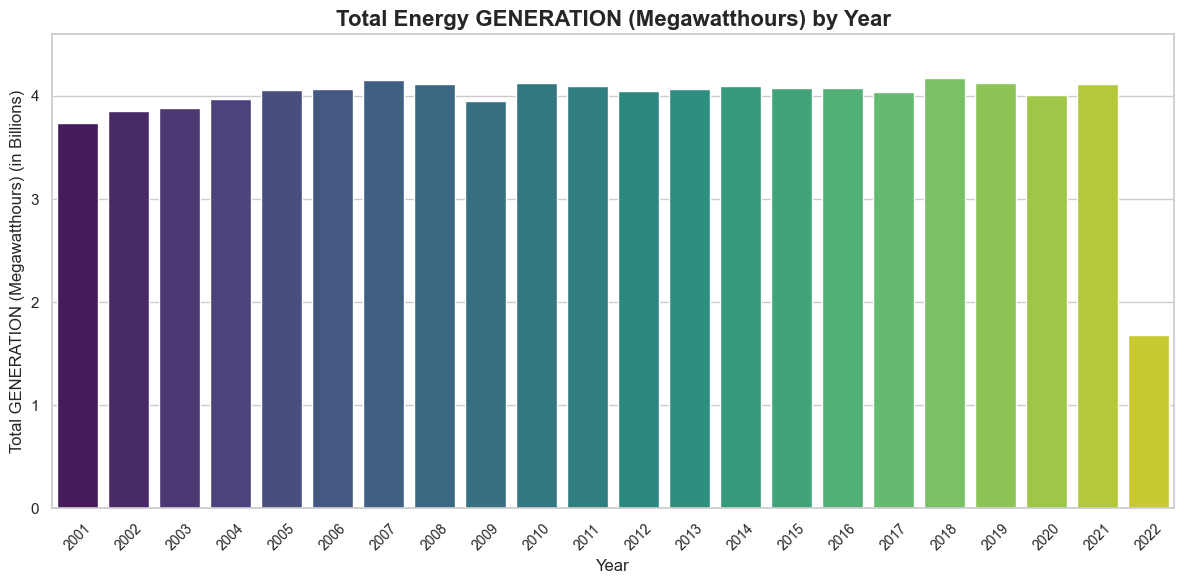

In [23]:


# Example: Aggregating total generation by 'YEAR'
energy_by_year = Total_energy.groupby('YEAR')['GENERATION (Megawatthours)'].sum().reset_index()

# Converting the 'GENERATION (Megawatthours)' column to billions for easier visualization
energy_by_year['GENERATION (Megawatthours)'] = energy_by_year['GENERATION (Megawatthours)'] / 1e9

# Setting the style for the plot
sns.set(style="whitegrid")

# Creating the bar plot
plt.figure(figsize=(12, 6))  # Adjusting figure size
sns.barplot(
    data=energy_by_year,
    x='YEAR',
    y='GENERATION (Megawatthours)',
    palette='viridis',  # Choose a beautiful color palette
)

# Adjusting y-axis scale to fit the data
plt.ylim(0, energy_by_year['GENERATION (Megawatthours)'].max() * 1.1)  # Adding a 10% margin above the highest value

# Adding titles and labels
plt.title('Total Energy GENERATION (Megawatthours) by Year', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total GENERATION (Megawatthours) (in Billions)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Displaying the plot
plt.tight_layout()
plt.show()


In [24]:


# Example DataFrame (replace 'Total_energy' with your actual DataFrame)
df = Total_energy.copy()

# Calculations for numerical variables (e.g., 'GENERATION (Megawatthours)')
numerical_summary = {
    'Mean': df['GENERATION (Megawatthours)'].mean(),
    'Median': df['GENERATION (Megawatthours)'].median(),
    'Mode': df['GENERATION (Megawatthours)'].mode()[0],  # Returns the first mode
    'Standard Deviation': df['GENERATION (Megawatthours)'].std(),
    'Variance': df['GENERATION (Megawatthours)'].var(),
    'Minimum': df['GENERATION (Megawatthours)'].min(),
    'Maximum': df['GENERATION (Megawatthours)'].max()
}

# Output the results
print("Numerical Summary:")
for measure, value in numerical_summary.items():
    print(f"{measure}: {value:.2f}")

# Summary for categorical variables (e.g., 'ENERGY SOURCE')
categorical_counts = df['ENERGY SOURCE'].value_counts()
categorical_proportions = df['ENERGY SOURCE'].value_counts(normalize=True)

# Output the results
print("\nCategorical Summary:")
print("Counts:")
print(categorical_counts)
print("\nProportions:")
print(categorical_proportions)


Numerical Summary:
Mean: 6438321.75
Median: 238945.71
Mode: 0.00
Standard Deviation: 17269263.35
Variance: 298227456608777.19
Minimum: -888367.00
Maximum: 149493973.00

Categorical Summary:
Counts:
ENERGY SOURCE
Coal                              1285
Petroleum                         1285
Natural Gas                       1285
Other Biomass                     1285
Wood and Wood Derived Fuels       1285
Other                             1285
Other Gases                       1159
Hydroelectric Conventional        1100
Solar Thermal and Photovoltaic     949
Wind                               824
Pumped Storage                     603
Geothermal                         580
Nuclear                            514
Name: count, dtype: int64

Proportions:
ENERGY SOURCE
Coal                              0.095617
Petroleum                         0.095617
Natural Gas                       0.095617
Other Biomass                     0.095617
Wood and Wood Derived Fuels       0.095617
Other       

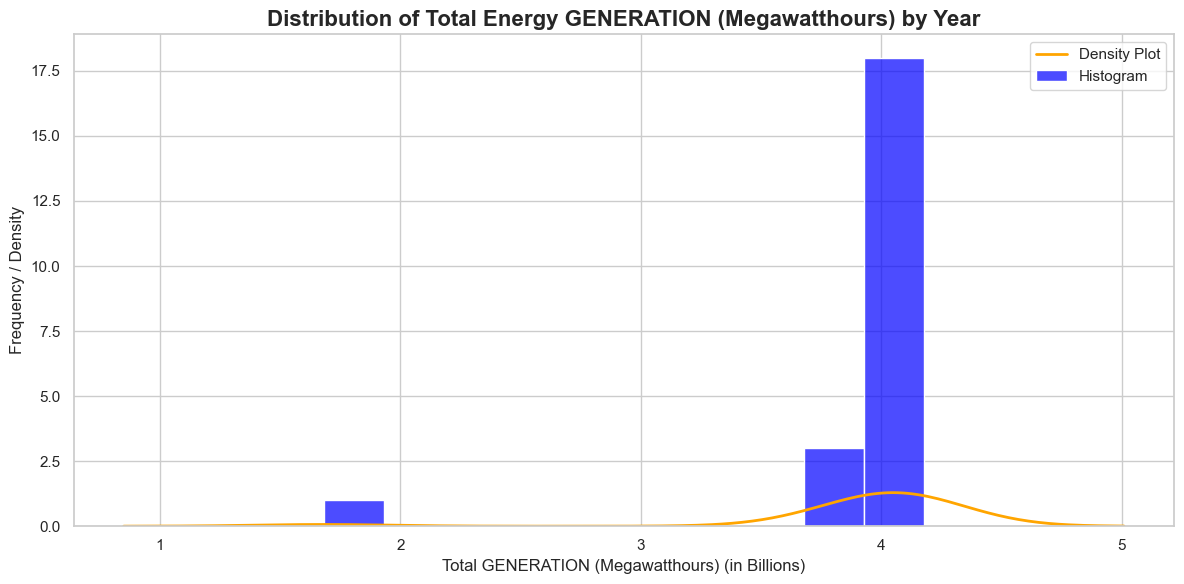

In [25]:


# Example: Aggregating total energy generation by 'YEAR'
energy_by_year = Total_energy.groupby('YEAR')['GENERATION (Megawatthours)'].sum().reset_index()

# Converting 'GENERATION (Megawatthours)' to billions for better readability
energy_by_year['GENERATION (Megawatthours)'] = energy_by_year['GENERATION (Megawatthours)'] / 1e9

# Setting the style
sns.set(style="whitegrid")

# Creating the figure and axes
plt.figure(figsize=(12, 6))

# Plotting the histogram
sns.histplot(
    data=energy_by_year,
    x='GENERATION (Megawatthours)',
    kde=False,
    bins=10,
    color='blue',
    alpha=0.7,
    label='Histogram'
)

# Plotting the density plot
sns.kdeplot(
    data=energy_by_year,
    x='GENERATION (Megawatthours)',
    color='orange',
    lw=2,
    label='Density Plot'
)

# Adding labels and title
plt.title('Distribution of Total Energy GENERATION (Megawatthours) by Year', fontsize=16, weight='bold')
plt.xlabel('Total GENERATION (Megawatthours) (in Billions)', fontsize=12)
plt.ylabel('Frequency / Density', fontsize=12)

# Adding a legend
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


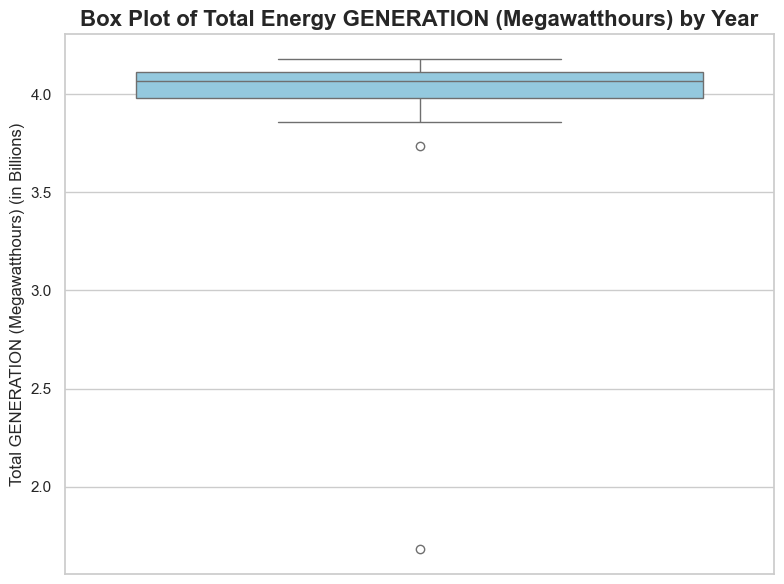

In [26]:


# Example: Aggregating total energy GENERATION (Megawatthours) by 'YEAR'
energy_by_year = Total_energy.groupby('YEAR')['GENERATION (Megawatthours)'].sum().reset_index()

# Converting 'GENERATION (Megawatthours)' to billions for better readability
energy_by_year['GENERATION (Megawatthours)'] = energy_by_year['GENERATION (Megawatthours)'] / 1e9

# Setting the style
sns.set(style="whitegrid")

# Creating the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=energy_by_year,
    y='GENERATION (Megawatthours)',
    color='skyblue'
)

# Adding labels and title
plt.title('Box Plot of Total Energy GENERATION (Megawatthours) by Year', fontsize=16, weight='bold')
plt.ylabel('Total GENERATION (Megawatthours) (in Billions)', fontsize=12)
plt.xlabel('')

# Displaying the plot
plt.tight_layout()
plt.show()


In [27]:
from scipy.stats import skew, kurtosis

# Example: Aggregating total energy generation by 'YEAR'
energy_by_year = Total_energy.groupby('YEAR')['GENERATION (Megawatthours)'].sum().reset_index()

# Calculating skewness and kurtosis for the 'GENERATION (Megawatthours)' column
data = energy_by_year['GENERATION (Megawatthours)']
skewness = skew(data)
kurt = kurtosis(data, fisher=True)  # Fisher=True for excess kurtosis

# Output the results
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")


Skewness: -4.08
Kurtosis: 15.40


Skewness:

Negative skewness (<0) means the distribution's tail is longer on the left side (left-skewed).

Kurtosis:

Kurtosis > 0: Heavier tails than normal (leptokurtic).



In [28]:
# Example: Aggregating total energy generation by 'YEAR'
energy_by_year = Total_energy.groupby('YEAR')['GENERATION (Megawatthours)'].sum().reset_index()

# Calculating percentiles
percentiles = {
    '25th Percentile (Q1)': energy_by_year['GENERATION (Megawatthours)'].quantile(0.25),
    '50th Percentile (Median)': energy_by_year['GENERATION (Megawatthours)'].quantile(0.50),
    '75th Percentile (Q3)': energy_by_year['GENERATION (Megawatthours)'].quantile(0.75),
    'Interquartile Range (IQR)': energy_by_year['GENERATION (Megawatthours)'].quantile(0.75) - energy_by_year['GENERATION (Megawatthours)'].quantile(0.25)
}

# Output the results
print("Percentile Analysis:")
for measure, value in percentiles.items():
    print(f"{measure}: {value:.2f}")


Percentile Analysis:
25th Percentile (Q1): 3979671106.25
50th Percentile (Median): 4065333142.39
75th Percentile (Q3): 4111819128.90
Interquartile Range (IQR): 132148022.65


In [29]:
# Example: Calculating the mode for categorical variables
mode_energy_source = Total_energy['ENERGY SOURCE'].mode()[0]
mode_type_of_producer = Total_energy['TYPE OF PRODUCER'].mode()[0]
mode_year = Total_energy['YEAR'].mode()[0]

# Output the results
print(f"Most Common Energy Source: {mode_energy_source}")
print(f"Most Common Type of Producer: {mode_type_of_producer}")
print(f"Most Common Year: {mode_year}")


Most Common Energy Source: Coal
Most Common Type of Producer: Electric Generators, Electric Utilities
Most Common Year: 2013


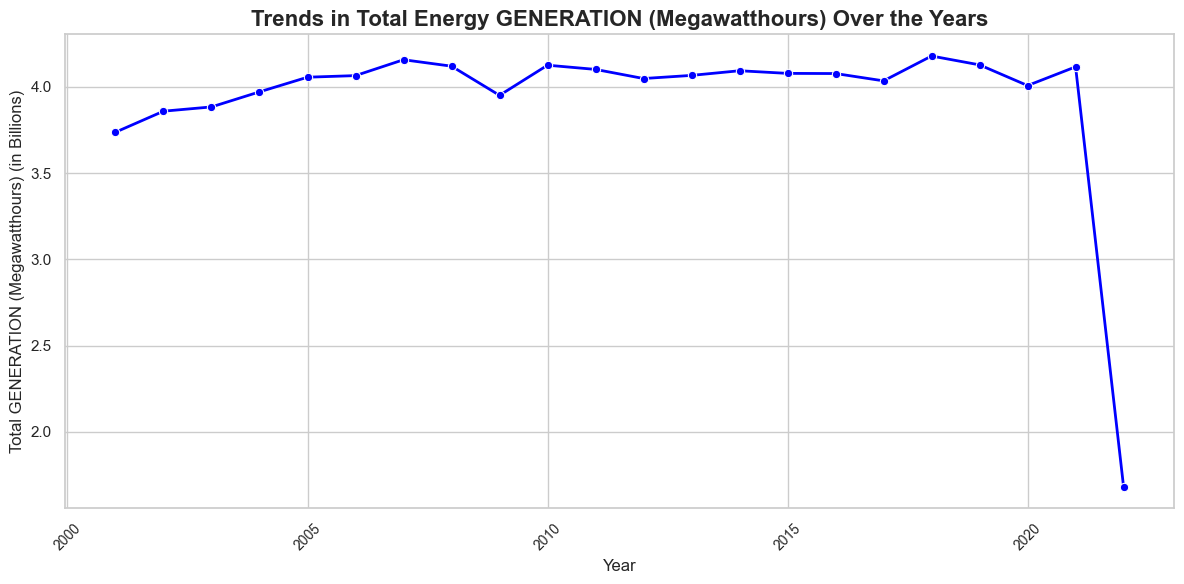

In [30]:


# Example: Aggregating total energy generation by 'YEAR'
energy_by_year = Total_energy.groupby('YEAR')['GENERATION (Megawatthours)'].sum().reset_index()

# Converting 'GENERATION (Megawatthours)' to billions for better readability
energy_by_year['GENERATION (Megawatthours)'] = energy_by_year['GENERATION (Megawatthours)'] / 1e9

# Setting the style
sns.set(style="whitegrid")

# Creating the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=energy_by_year,
    x='YEAR',
    y='GENERATION (Megawatthours)',
    marker='o',  # Adding markers for each data point
    color='blue',
    linewidth=2
)

# Adding labels and title
plt.title('Trends in Total Energy GENERATION (Megawatthours) Over the Years', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total GENERATION (Megawatthours) (in Billions)', fontsize=12)

# Adjusting the x-axis for readability
plt.xticks(rotation=45, fontsize=10)

# Displaying the plot
plt.tight_layout()
plt.show()


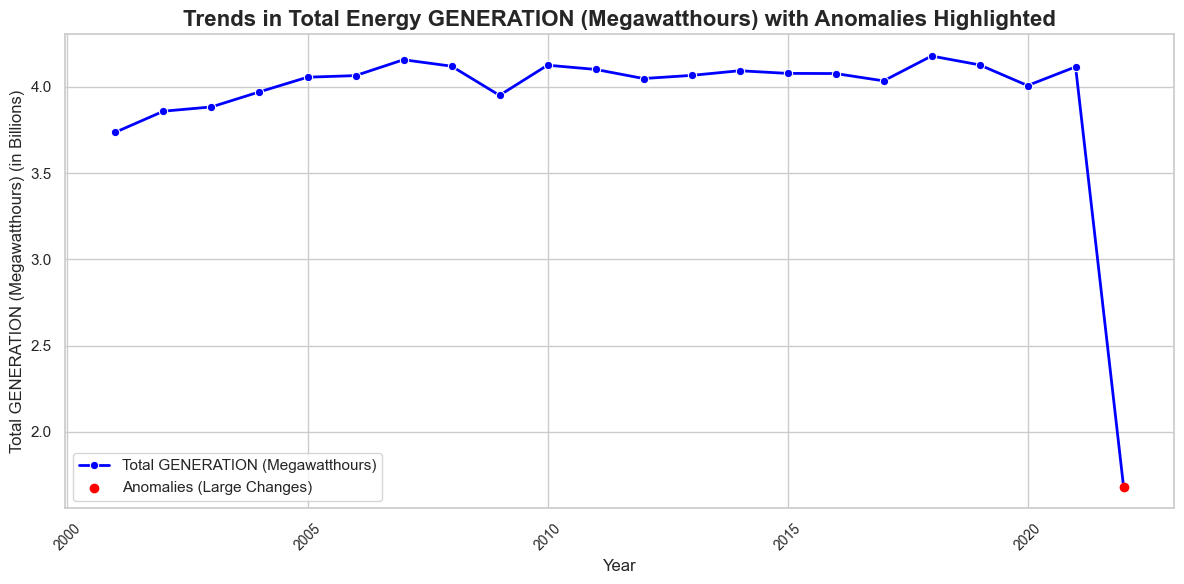

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Aggregating total energy generation by 'YEAR'
energy_by_year = Total_energy.groupby('YEAR')['GENERATION (Megawatthours)'].sum().reset_index()

# Converting 'GENERATION (Megawatthours)' to billions for better readability
energy_by_year['GENERATION (Megawatthours)'] = energy_by_year['GENERATION (Megawatthours)'] / 1e9

# Adding a column for year-over-year change
energy_by_year['YoY Change'] = energy_by_year['GENERATION (Megawatthours)'].diff()

# Setting the style
sns.set(style="whitegrid")

# Creating the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=energy_by_year,
    x='YEAR',
    y='GENERATION (Megawatthours)',
    marker='o',
    color='blue',
    linewidth=2,
    label='Total GENERATION (Megawatthours)'
)

# Highlighting years with large changes (YoY Change > threshold)
threshold = energy_by_year['YoY Change'].abs().mean() * 2  # Example threshold (2x mean YoY change)
anomalies = energy_by_year[energy_by_year['YoY Change'].abs() > threshold]

plt.scatter(
    anomalies['YEAR'],
    anomalies['GENERATION (Megawatthours)'],
    color='red',
    label='Anomalies (Large Changes)',
    zorder=5
)

# Adding labels and title
plt.title('Trends in Total Energy GENERATION (Megawatthours) with Anomalies Highlighted', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total GENERATION (Megawatthours) (in Billions)', fontsize=12)
plt.legend()

# Rotating x-axis labels for readability
plt.xticks(rotation=45, fontsize=10)

# Displaying the plot
plt.tight_layout()
plt.show()


In [32]:
# Aggregating total generation by 'ENERGY SOURCE'
energy_by_source = Total_energy.groupby('ENERGY SOURCE')['GENERATION (Megawatthours)'].sum().reset_index()

# Calculating the total energy generation
total_generation = energy_by_source['GENERATION (Megawatthours)'].sum()

# Adding a column for the proportion of total energy
energy_by_source['Proportion (%)'] = (energy_by_source['GENERATION (Megawatthours)'] / total_generation) * 100

# Output the results
print("Proportion of Total Energy by Source:")
print(energy_by_source[['ENERGY SOURCE', 'Proportion (%)']])


Proportion of Total Energy by Source:
                     ENERGY SOURCE  Proportion (%)
0                             Coal       38.986044
1                       Geothermal        0.378722
2       Hydroelectric Conventional        6.712627
3                      Natural Gas       26.931405
4                          Nuclear       19.579449
5                            Other        0.322818
6                    Other Biomass        0.455329
7                      Other Gases        0.307653
8                        Petroleum        1.281252
9                   Pumped Storage       -0.155550
10  Solar Thermal and Photovoltaic        0.637912
11                            Wind        3.606826
12     Wood and Wood Derived Fuels        0.955514


In [33]:
# Calculating the count of each TYPE OF PRODUCER
producer_counts = Total_energy['TYPE OF PRODUCER'].value_counts()

# Calculating the total number of producers
total_producers = producer_counts.sum()

# Calculating the percentage for each TYPE OF PRODUCER
producer_percentages = (producer_counts / total_producers) * 100

# Output the results
print("Percentage of Producers by Type:")
print(producer_percentages)


Percentage of Producers by Type:
TYPE OF PRODUCER
Electric Generators, Electric Utilities             24.860481
Electric Generators, Independent Power Producers    24.771188
Combined Heat and Power, Commercial Power           17.910559
Combined Heat and Power, Industrial Power           17.694769
Combined Heat and Power, Electric Power             14.763003
Name: count, dtype: float64


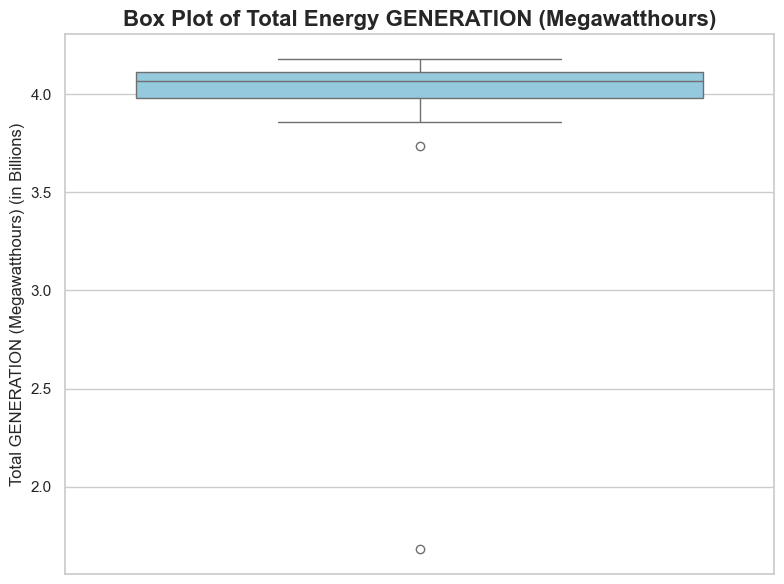

In [34]:


# Example: Aggregating total energy generation
energy_by_year = Total_energy.groupby('YEAR')['GENERATION (Megawatthours)'].sum().reset_index()

# Converting 'GENERATION (Megawatthours)' to billions for readability
energy_by_year['GENERATION (Megawatthours)'] = energy_by_year['GENERATION (Megawatthours)'] / 1e9

# Creating the box plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(y=energy_by_year['GENERATION (Megawatthours)'], color='skyblue')

# Adding labels and title
plt.title('Box Plot of Total Energy GENERATION (Megawatthours)', fontsize=16, weight='bold')
plt.ylabel('Total GENERATION (Megawatthours) (in Billions)', fontsize=12)

# Displaying the plot
plt.tight_layout()
plt.show()


In [35]:
from scipy.stats import zscore

# Calculate Z-scores for 'GENERATION (Megawatthours)'
energy_by_year['Z-Score'] = zscore(energy_by_year['GENERATION (Megawatthours)'])

# Identifying outliers
outliers_zscore = energy_by_year[energy_by_year['Z-Score'].abs() > 3]

# Output the results
print("Outliers identified using Z-scores:")
print(outliers_zscore)


Outliers identified using Z-scores:
    YEAR  GENERATION (Megawatthours)   Z-Score
21  2022                    1.680536 -4.484941


A Z-score greater than 3 or less than -3 indicates that a data point is far from the mean, marking it as an outlier.

In [36]:
# Calculating IQR
Q1 = energy_by_year['GENERATION (Megawatthours)'].quantile(0.25)
Q3 = energy_by_year['GENERATION (Megawatthours)'].quantile(0.75)
IQR = Q3 - Q1

# Calculating lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_iqr = energy_by_year[
    (energy_by_year['GENERATION (Megawatthours)'] < lower_bound) | 
    (energy_by_year['GENERATION (Megawatthours)'] > upper_bound)
]

# Output the results
print("Outliers identified using IQR:")
print(outliers_iqr)


Outliers identified using IQR:
    YEAR  GENERATION (Megawatthours)   Z-Score
0   2001                    3.736644 -0.390855
21  2022                    1.680536 -4.484941


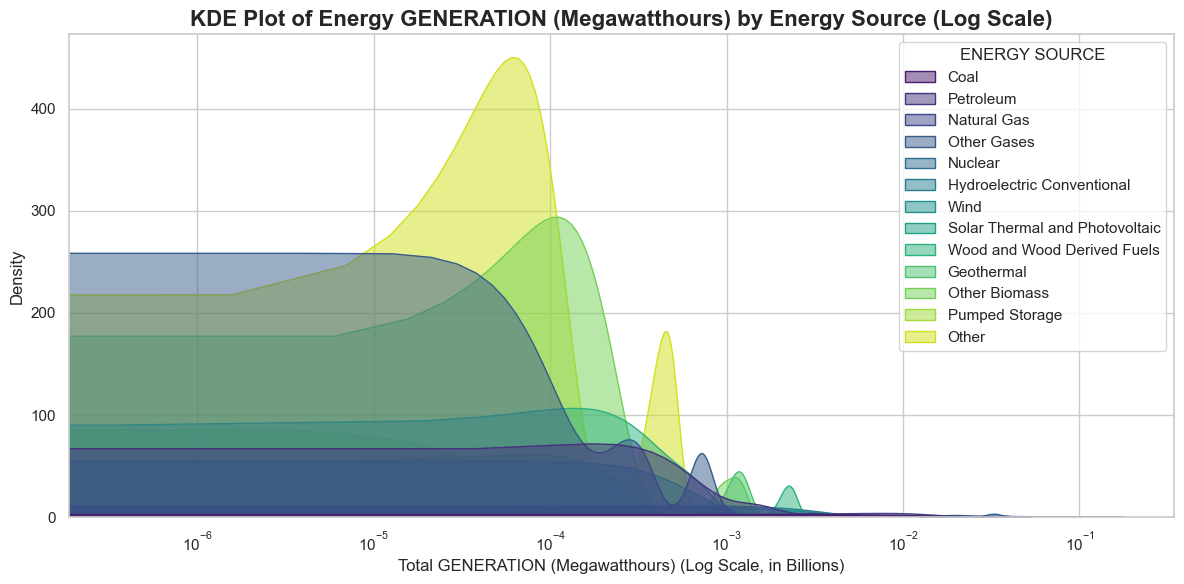

In [37]:


# Example: Preparing the data
# Assuming `Total_energy` DataFrame contains a 'GENERATION (Megawatthours)' column and an 'ENERGY SOURCE' column

# Converting 'GENERATION (Megawatthours)' to billions for readability (optional)
Total_energy['GENERATION (Megawatthours)'] = Total_energy['GENERATION (Megawatthours)'] / 1e9

# Setting the style
sns.set(style="whitegrid")

# Creating the KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=Total_energy,
    x='GENERATION (Megawatthours)',
    hue='ENERGY SOURCE',  # Group by 'ENERGY SOURCE'
    fill=True,  # Fill the area under the curve
    alpha=0.5,  # Transparency for filled areas
    palette='viridis'  # A visually appealing palette
)

# Setting the x-axis to logarithmic scale
plt.xscale('log')

# Adding labels and title
plt.title('KDE Plot of Energy GENERATION (Megawatthours) by Energy Source (Log Scale)', fontsize=16, weight='bold')
plt.xlabel('Total GENERATION (Megawatthours) (Log Scale, in Billions)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Displaying the plot
plt.tight_layout()
plt.show()


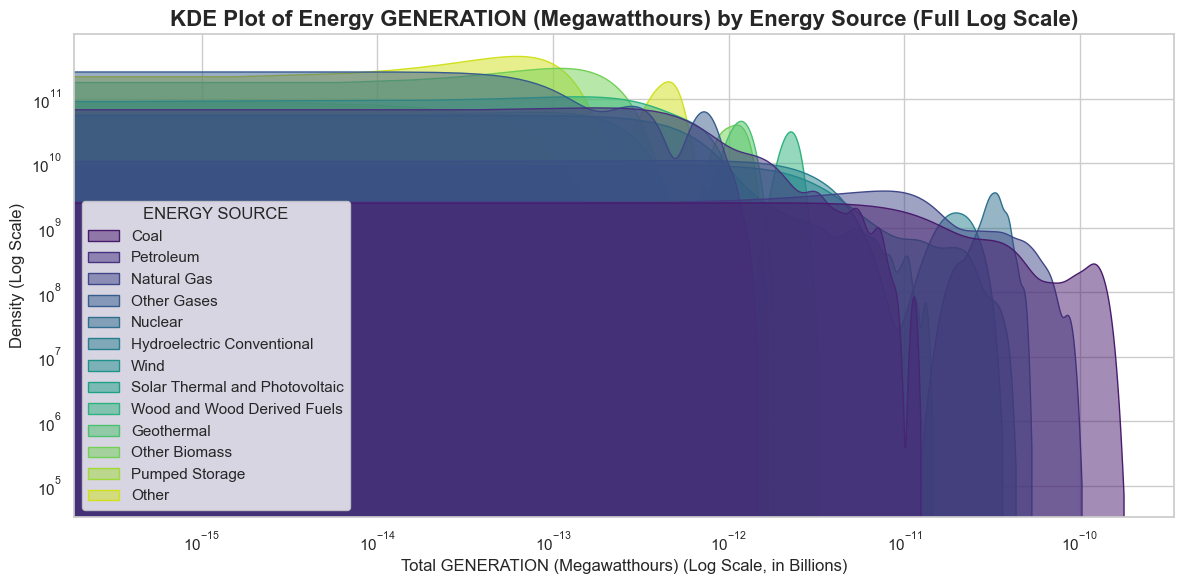

In [38]:


# Example: Preparing the data
# Assuming `Total_energy` DataFrame contains a 'GENERATION (Megawatthours)' column and an 'ENERGY SOURCE' column

# Converting 'GENERATION (Megawatthours)' to billions for readability (optional)
Total_energy['GENERATION (Megawatthours)'] = Total_energy['GENERATION (Megawatthours)'] / 1e9

# Setting the style
sns.set(style="whitegrid")

# Creating the KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=Total_energy,
    x='GENERATION (Megawatthours)',
    hue='ENERGY SOURCE',  # Group by 'ENERGY SOURCE'
    fill=True,  # Fill the area under the curve
    alpha=0.5,  # Transparency for filled areas
    palette='viridis'  # A visually appealing palette
)

# Setting logarithmic scales for both axes
plt.xscale('log')
plt.yscale('log')

# Adding labels and title
plt.title('KDE Plot of Energy GENERATION (Megawatthours) by Energy Source (Full Log Scale)', fontsize=16, weight='bold')
plt.xlabel('Total GENERATION (Megawatthours) (Log Scale, in Billions)', fontsize=12)
plt.ylabel('Density (Log Scale)', fontsize=12)

# Displaying the plot
plt.tight_layout()
plt.show()


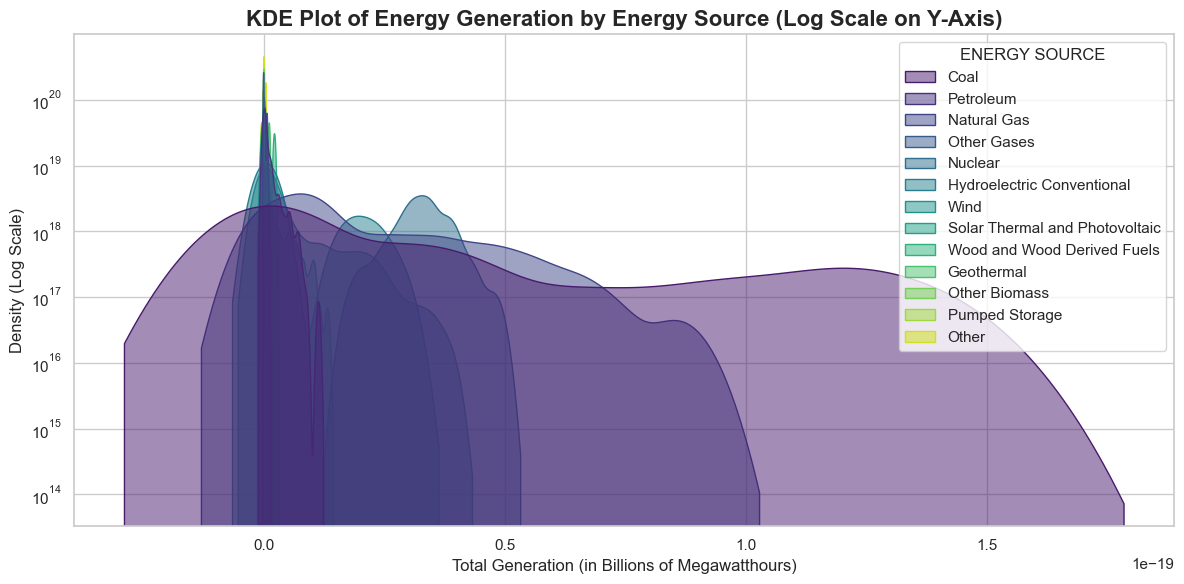

In [39]:


# Example: Preparing the data
# Assuming `Total_energy` contains 'GENERATION (Megawatthours)' and 'ENERGY SOURCE' columns

# Converting 'Generation' to billions for readability (optional)
Total_energy['Generation (Billions)'] = Total_energy['GENERATION (Megawatthours)'] / 1e9

# Setting the style
sns.set(style="whitegrid")

# Creating the KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=Total_energy,
    x='Generation (Billions)',
    hue='ENERGY SOURCE',  # Group by 'ENERGY SOURCE'
    fill=True,            # Fill the area under the curves
    alpha=0.5,            # Adjusting transparency
    palette='viridis'     # Beautiful color palette
)

# Setting the y-axis to logarithmic scale
plt.yscale('log')

# Adding labels and title
plt.title('KDE Plot of Energy Generation by Energy Source (Log Scale on Y-Axis)', fontsize=16, weight='bold')
plt.xlabel('Total Generation (in Billions of Megawatthours)', fontsize=12)
plt.ylabel('Density (Log Scale)', fontsize=12)

# Displaying the plot
plt.tight_layout()
plt.show()


C:\Users\fjmrm\AppData\Local\Temp\ipykernel_35556\2864761382.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
c:\Users\fjmrm\Downloads\CODING\REPOSITORIES\DX699AI\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\fjmrm\Downloads\CODING\REPOSITORIES\DX699AI\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 98.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\fjmrm\Downloads\CODING\REPOSITORIES\DX699AI\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use str

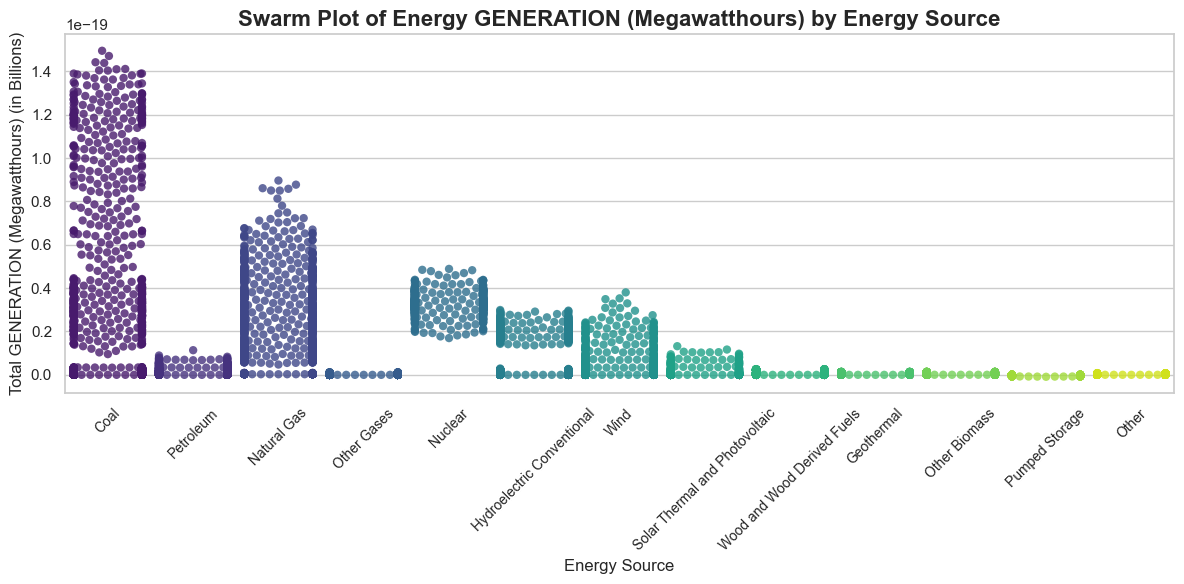

In [40]:


# Example: Preparing the data
# Assuming `Total_energy` contains 'ENERGY SOURCE' as categories and 'GENERATION (Megawatthours)' as numerical values

# Converting 'GENERATION (Megawatthours)' to billions for readability (optional)
Total_energy['GENERATION (Megawatthours)'] = Total_energy['GENERATION (Megawatthours)'] / 1e9

# Setting the style
sns.set(style="whitegrid")

# Creating the swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(
    data=Total_energy,
    x='ENERGY SOURCE',  # Categories on the x-axis
    y='GENERATION (Megawatthours)',     # Numerical values on the y-axis
    palette='viridis',  # A beautiful color palette
    size=6,             # Adjusting point size for better visibility
    alpha=0.8           # Transparency of points
)

# Adding labels and title
plt.title('Swarm Plot of Energy GENERATION (Megawatthours) by Energy Source', fontsize=16, weight='bold')
plt.xlabel('Energy Source', fontsize=12)
plt.ylabel('Total GENERATION (Megawatthours) (in Billions)', fontsize=12)

# Rotating x-axis labels for readability
plt.xticks(rotation=45, fontsize=10)

# Displaying the plot
plt.tight_layout()
plt.show()


<b> Heat map

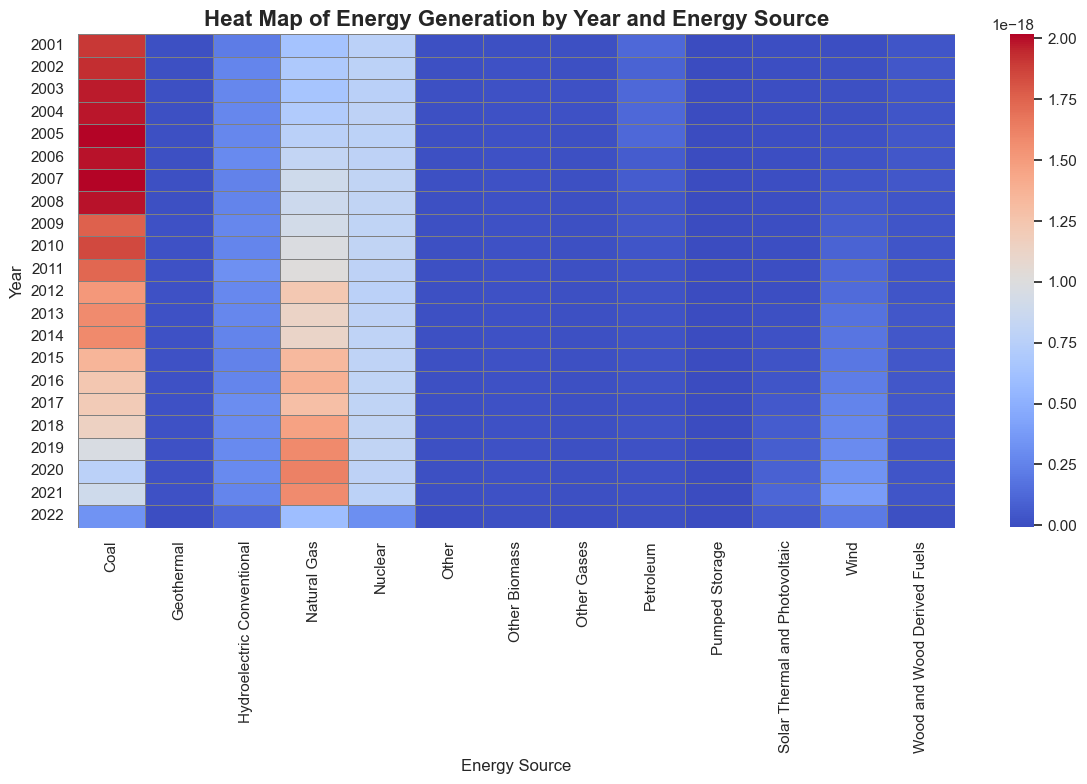

In [42]:


# Example: Creating a pivot table for heat map (adjust columns as needed)
heatmap_data = Total_energy.pivot_table(
    index='YEAR',                     # Rows (e.g., years)
    columns='ENERGY SOURCE',          # Columns (e.g., energy sources)
    values='GENERATION (Megawatthours)',  # Values to aggregate
    aggfunc='sum'                     # Aggregation function (sum for total generation)
)

# Setting up the figure
plt.figure(figsize=(12, 8))

# Creating the heat map
sns.heatmap(
    data=heatmap_data,
    cmap='coolwarm',                  # Color map
    annot=False,                      # Do not show numbers on the heatmap
    linewidths=0.5,                   # Space between cells
    linecolor='gray'                  # Color of grid lines
)

# Adding labels and title
plt.title('Heat Map of Energy Generation by Year and Energy Source', fontsize=16, weight='bold')
plt.xlabel('Energy Source', fontsize=12)
plt.ylabel('Year', fontsize=12)

# Displaying the heat map
plt.tight_layout()
plt.show()


In [43]:
source_new = Total_energy[Total_energy['ENERGY SOURCE']!='Total']
source_new

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours),Generation (Millions),Generation (Billions)
1619,2001,January,US-TOTAL,"Electric Generators, Electric Utilities",Coal,1.438563e-19,143.856344,1.438563e-19
1620,2001,January,US-TOTAL,"Electric Generators, Electric Utilities",Petroleum,1.137379e-20,11.373785,1.137379e-20
1621,2001,January,US-TOTAL,"Electric Generators, Electric Utilities",Natural Gas,1.555342e-20,15.553422,1.555342e-20
1622,2001,January,US-TOTAL,"Electric Generators, Electric Utilities",Other Gases,0.000000e+00,0.000000,0.000000e+00
1623,2001,January,US-TOTAL,"Electric Generators, Electric Utilities",Nuclear,4.887559e-20,48.875592,4.887559e-20
...,...,...,...,...,...,...,...,...
10317,2022,May,US-TOTAL,"Electric Generators, Electric Utilities",Petroleum,1.153849e-21,1.153849,1.153849e-21
10318,2022,May,US-TOTAL,"Electric Generators, Electric Utilities",Solar Thermal and Photovoltaic,1.833664e-21,1.833664,1.833664e-21
10319,2022,May,US-TOTAL,"Electric Generators, Electric Utilities",Other Biomass,9.225500e-23,0.092255,9.225500e-23
10320,2022,May,US-TOTAL,"Electric Generators, Electric Utilities",Wind,6.936214e-21,6.936214,6.936214e-21


In [44]:
#New dataframe
real_names=pd.read_csv("states.csv")
real_names.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [45]:
plot2=Total_energy.groupby(by=["YEAR","ENERGY SOURCE"]).sum().reset_index()
plot2

,YEAR,ENERGY SOURCE,MONTH,STATE,TYPE OF PRODUCER,GENERATION (Megawatthours),Generation (Millions),Generation (Billions)
0,2001,Coal,JanuaryJanuaryJanuaryJanuaryJanuaryFebruaryFeb...,US-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOT...,"Electric Generators, Electric UtilitiesElectri...",1.903956e-18,1903.955942,1.903956e-18
1,2001,Geothermal,JanuaryJanuaryFebruaryFebruaryMarchMarchAprilA...,US-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOT...,"Electric Generators, Electric UtilitiesElectri...",1.374050e-20,13.740501,1.374050e-20
2,2001,Hydroelectric Conventional,JanuaryJanuaryJanuaryJanuaryFebruaryFebruaryFe...,US-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOT...,"Electric Generators, Electric UtilitiesElectri...",2.169610e-19,216.961045,2.169610e-19
3,2001,Natural Gas,JanuaryJanuaryJanuaryJanuaryJanuaryFebruaryFeb...,US-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOT...,"Electric Generators, Electric UtilitiesElectri...",6.391291e-19,639.129119,6.391291e-19
4,2001,Nuclear,JanuaryJanuaryFebruaryFebruaryMarchMarchAprilA...,US-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOT...,"Electric Generators, Electric UtilitiesElectri...",7.688263e-19,768.826308,7.688263e-19
...,...,...,...,...,...,...,...,...
281,2022,Petroleum,JanuaryJanuaryJanuaryJanuaryJanuaryFebruaryFeb...,US-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOT...,"Combined Heat and Power, Industrial PowerCombi...",9.574128e-21,9.574128,9.574128e-21
282,2022,Pumped Storage,JanuaryJanuaryJanuaryFebruaryFebruaryFebruaryM...,US-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOT...,"Combined Heat and Power, Commercial PowerElect...",-1.955048e-21,-1.955048,-1.955048e-21
283,2022,Solar Thermal and Photovoltaic,JanuaryJanuaryJanuaryJanuaryJanuaryFebruaryFeb...,US-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOT...,"Combined Heat and Power, Industrial PowerCombi...",5.773222e-20,57.732224,5.773222e-20
284,2022,Wind,JanuaryJanuaryJanuaryJanuaryFebruaryFebruaryFe...,US-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOTALUS-TOT...,"Combined Heat and Power, Industrial PowerCombi...",2.076954e-19,207.695447,2.076954e-19


In [46]:
renewable=['Hydroelectric Conventional', 'Solar Thermal and Photovoltaic', 'Wind', 'Geothermal', 'Other Biomass', 'Wood and Wood Derived Fuels']
renewable

['Hydroelectric Conventional',
 'Solar Thermal and Photovoltaic',
 'Wind',
 'Geothermal',
 'Other Biomass',
 'Wood and Wood Derived Fuels']

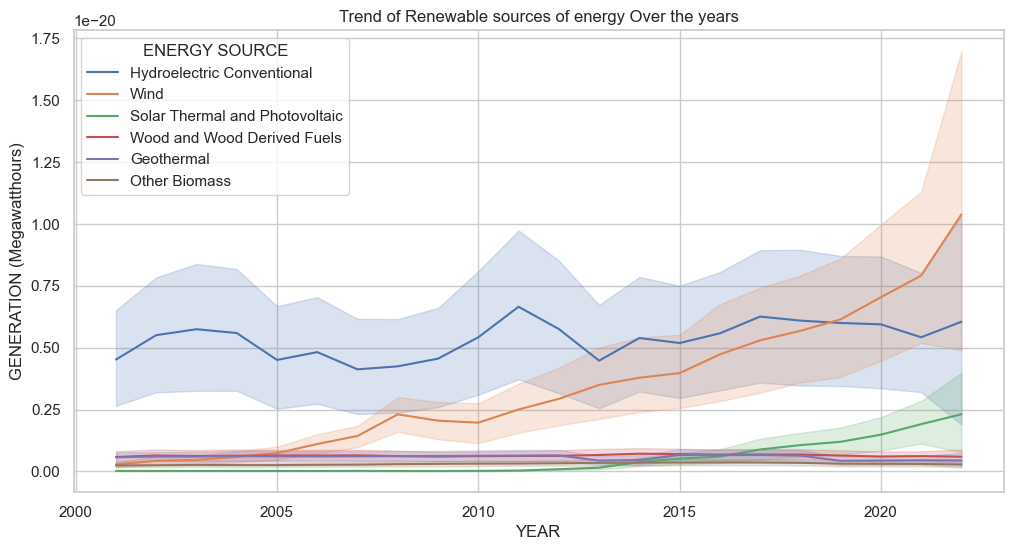

In [47]:
plt.figure(figsize=(12,6))
sns.lineplot(data=source_new[source_new['ENERGY SOURCE'].isin(renewable)], x='YEAR', y='GENERATION (Megawatthours)', hue='ENERGY SOURCE')
plt.title('Trend of Renewable sources of energy Over the years')
plt.show()

In [48]:
conventional = ['Coal', 'Petroleum', 'Natural Gas', 'Nuclear']
conventional

['Coal', 'Petroleum', 'Natural Gas', 'Nuclear']

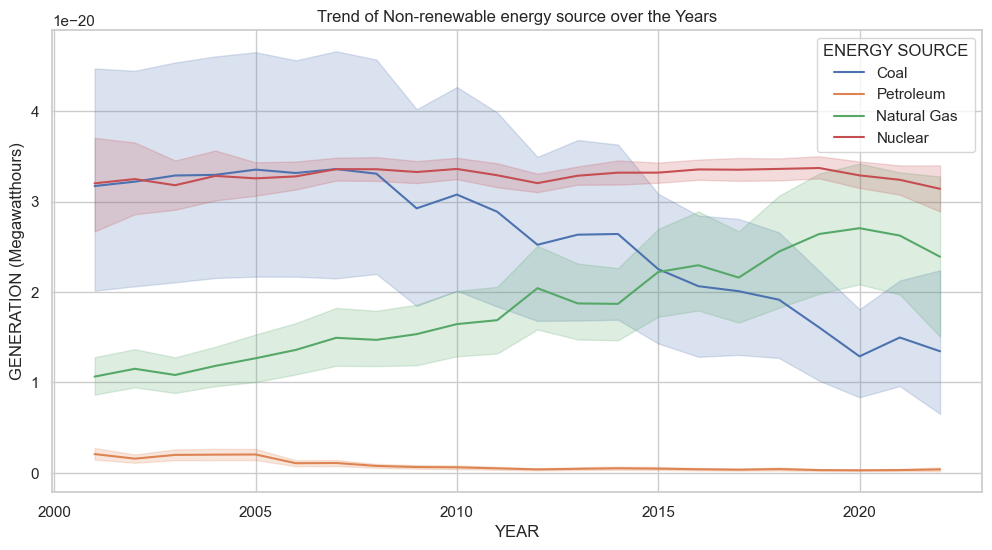

In [49]:
plt.figure(figsize=(12,6))
sns.lineplot(data=source_new[source_new['ENERGY SOURCE'].isin(conventional)], x='YEAR', y='GENERATION (Megawatthours)', hue = 'ENERGY SOURCE')
plt.title('Trend of Non-renewable energy source over the Years')
plt.show()

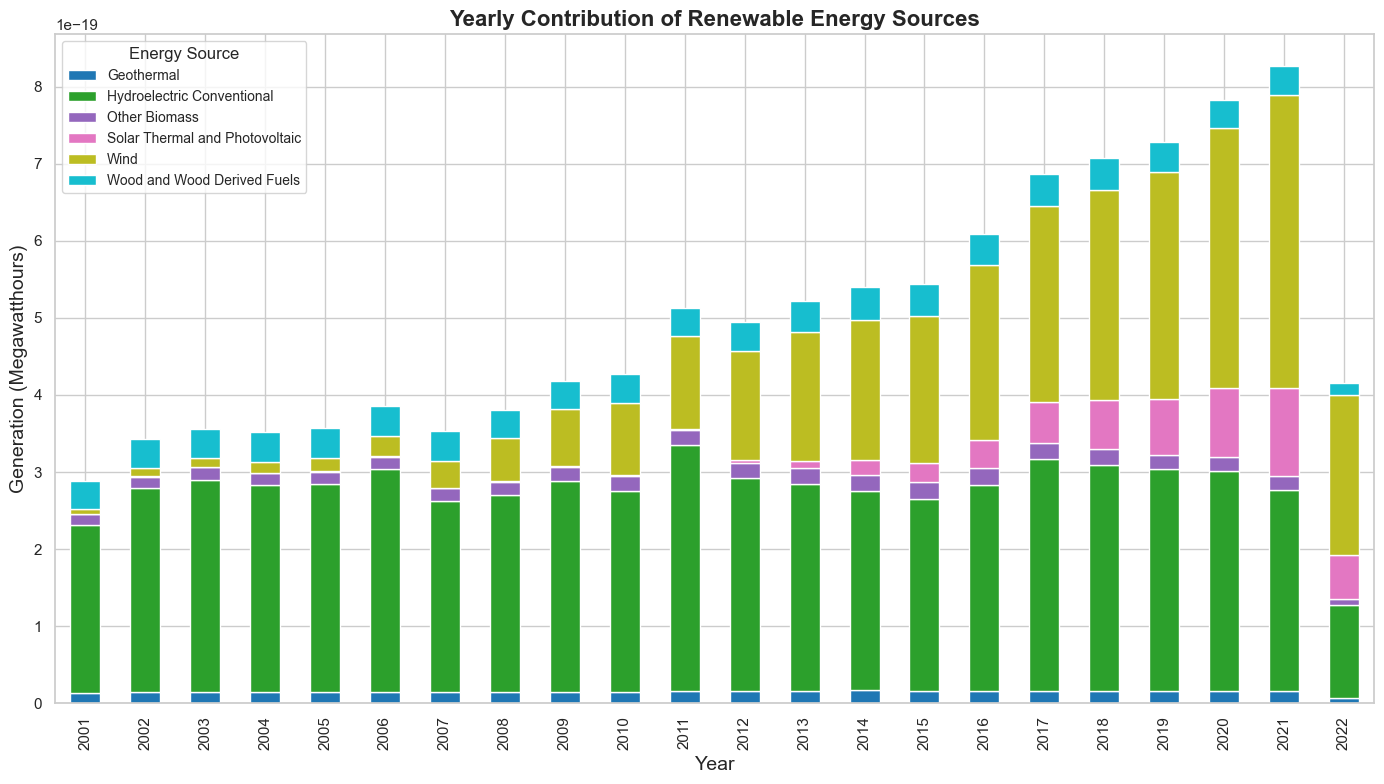

In [50]:


# Filter the data to include only renewable energy sources
renewable = [
    'Hydroelectric Conventional', 
    'Solar Thermal and Photovoltaic', 
    'Wind', 
    'Geothermal', 
    'Other Biomass', 
    'Wood and Wood Derived Fuels'
]
renewable_data = source_new[source_new['ENERGY SOURCE'].isin(renewable)]

# Create a pivot table to prepare data for a stacked bar chart
pivot_data = renewable_data.pivot_table(
    index='YEAR', 
    columns='ENERGY SOURCE', 
    values='GENERATION (Megawatthours)', 
    aggfunc='sum'
)

# Plotting the stacked bar chart
pivot_data.plot(
    kind='bar', 
    stacked=True, 
    figsize=(14, 8),
    colormap='tab10'  # Use a colorful palette
)

# Add titles and labels
plt.title('Yearly Contribution of Renewable Energy Sources', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Generation (Megawatthours)', fontsize=14)
plt.legend(title='Energy Source', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

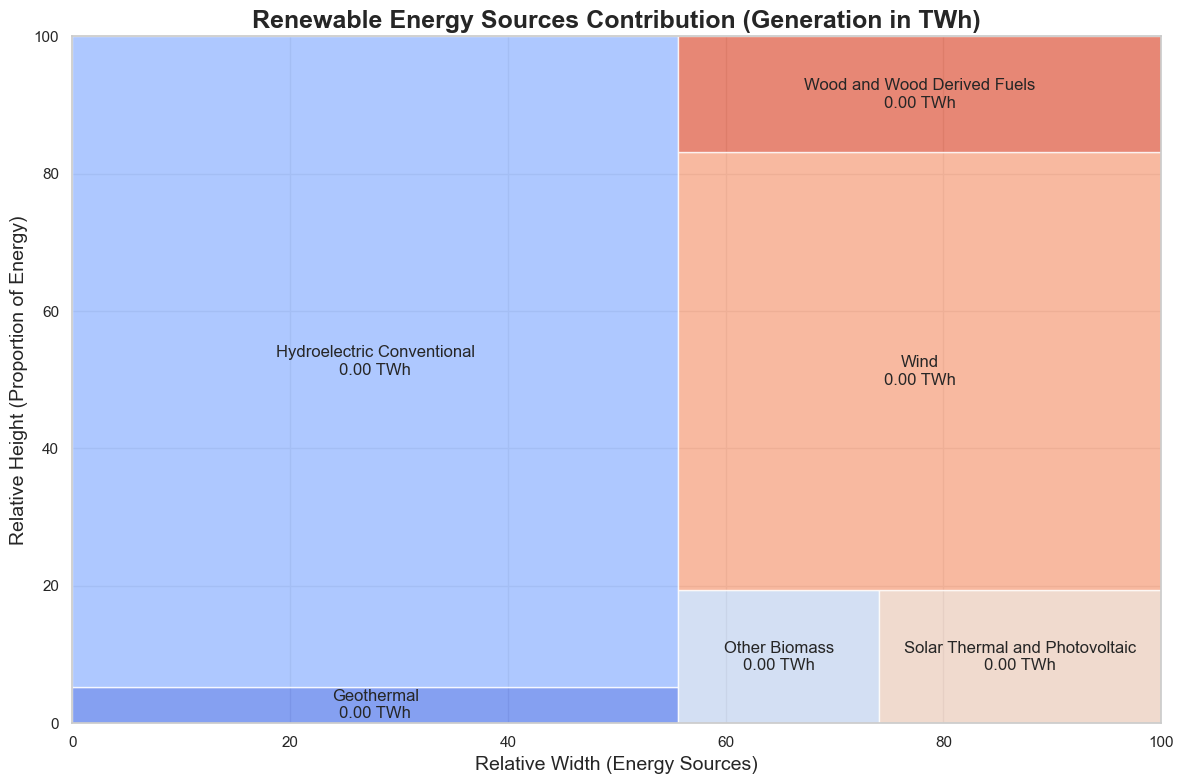

In [54]:

import squarify  # Install with `pip install squarify`

# Prepare data for the treemap
renewable = ['Hydroelectric Conventional', 'Solar Thermal and Photovoltaic', 'Wind', 'Geothermal', 'Other Biomass', 'Wood and Wood Derived Fuels']
data = source_new[source_new['ENERGY SOURCE'].isin(renewable)].groupby('ENERGY SOURCE')['GENERATION (Megawatthours)'].sum()

# Extract labels and sizes for the treemap
labels = [f"{energy_source}\n{value/1e6:.2f} TWh" for energy_source, value in zip(data.index, data.values)]
sizes = data.values.tolist()

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=sns.color_palette("coolwarm", len(sizes)),  # Choose a color palette
    alpha=0.8  # Add transparency for better aesthetics
)

# Add title and axes labels
plt.title('Renewable Energy Sources Contribution (Generation in TWh)', fontsize=18, weight='bold')
plt.xlabel('Relative Width (Energy Sources)', fontsize=14)
plt.ylabel('Relative Height (Proportion of Energy)', fontsize=14)

# Enable axes
plt.axis('on')  # Turn on the axes for display

# Display the treemap
plt.tight_layout()
plt.show()


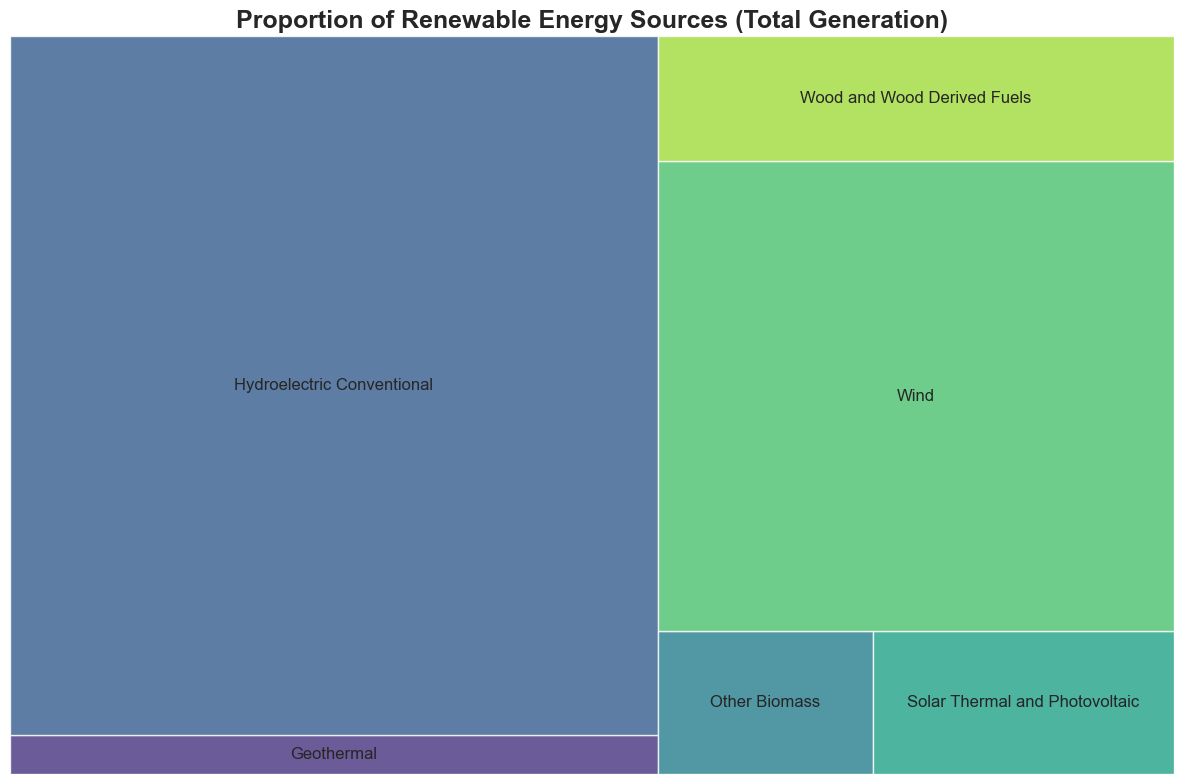

In [53]:

import squarify  # Install with `pip install squarify`

# Prepare data for the treemap
renewable = ['Hydroelectric Conventional', 'Solar Thermal and Photovoltaic', 'Wind', 'Geothermal', 'Other Biomass', 'Wood and Wood Derived Fuels']
data = source_new[source_new['ENERGY SOURCE'].isin(renewable)].groupby('ENERGY SOURCE')['GENERATION (Megawatthours)'].sum()

# Extract labels and sizes
labels = data.index.tolist()
sizes = data.values.tolist()

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=sns.color_palette("viridis", len(sizes)),  # Color palette for aesthetics
    alpha=0.8  # Transparency for better visuals
)

# Add a title and remove axes
plt.title('Proportion of Renewable Energy Sources (Total Generation)', fontsize=18, weight='bold')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()
